In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 시간 측정을 위한 시간 모듈
import datetime

# 피마 인디언 당뇨평 데이터
- 서구 문명이 원시 문명 유입되었을 때 건강상태 변화를 알게해준 중요한 데이터
- 피마 인디언 마을에 페스트푸드점이 들어온 이후 당뇨병 환자가 얼마나 발생했는지 알아볼 수 있는 데이터
- outcome이 결과데이터 이며 0 은 당뇨 음성, 1은 당뇨 양성에 해당한다.

### 데이터를 읽어온다.

In [2]:
train_df = pd.read_csv('data/diabetes_train.csv')
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
test_df = pd.read_csv('data/diabetes_test.csv')
test_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,108,88,19,0,27.1,0.400,24
1,6,96,0,0,0,23.7,0.190,28
2,1,124,74,36,0,27.8,0.100,30
3,7,150,78,29,126,35.2,0.692,54
4,4,183,0,0,0,28.4,0.212,36


- Pregnancies : 임신 횟수
- Glucose : 포도당 부하 검사 수치
- BooldPressure : 혈압
- SkinThickness : 팔 삼두근 뒤쪽의 피하지방 측정값
- Insulin : 혈청 인슐린
- BMI : 체질량지수
- DiabetsPedigreeFunction : 당뇨 내력 가중치 값
- Age : 나이
- Outcome : 결과 값

### 데이터 프레임 정보 확인

In [4]:
# 결측치 확인
train_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
test_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

### 데이터 전처리

In [6]:
# 처리의 용이성을 위해 두 데이터 프레임을 합친다.
data = pd.concat((train_df, test_df))
# 인덱스를 다시 초기화  해준다.
data.reset_index(drop=True, inplace=True)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1.0
1,1,85,66,29,0,26.6,0.351,31,0.0
2,8,183,64,0,0,23.3,0.672,32,1.0
3,1,89,66,23,94,28.1,0.167,21,0.0
4,0,137,40,35,168,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,NaN
764,2,122,70,27,0,36.8,0.340,27,NaN
765,5,121,72,23,112,26.2,0.245,30,NaN
766,1,126,60,0,0,30.1,0.349,47,NaN


### Pregnancies
- 임신 횟수

In [7]:
# 결측치 확인
data['Pregnancies'].isna().sum()

0

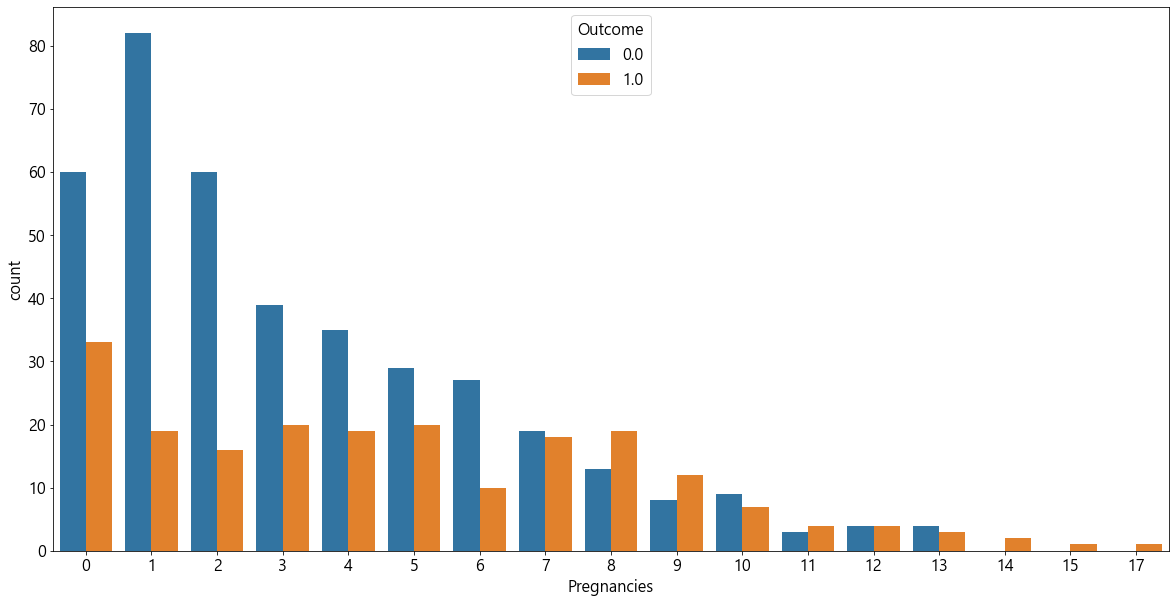

In [8]:
# 결측치를 제외하고 데이터가 같은 것 끼리 그룹으로 묶어 그 수를 구해 그래프로
# 그린다.
# x = 수를 계산할 컬럼
# hue = 결과데이터 컬럼
sns.countplot(data=data, x='Pregnancies', hue='Outcome')
plt.show()

임신 횟수에 따라 당뇨병 발병 확률이 달라진다

### Glucose
- 포도당 부하 검사 수치

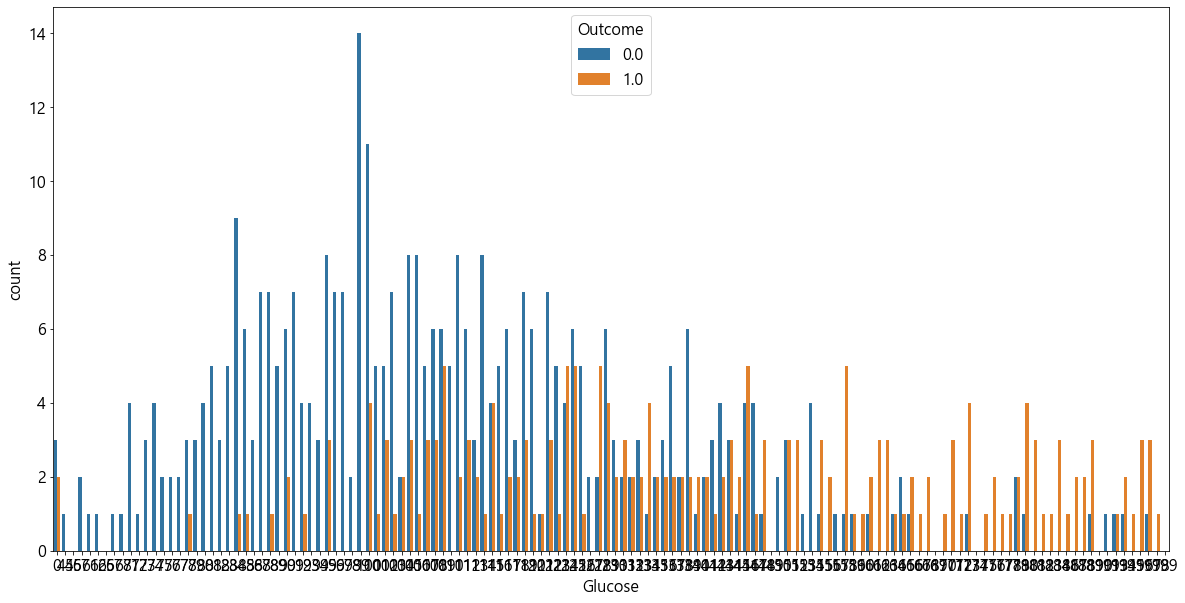

In [9]:
sns.countplot(data=data, x='Glucose', hue='Outcome')
plt.show()

포도당 수치가 높을 수록 당뇨병에 걸릴 확률이 높다

### BloodPressure
- 혈압

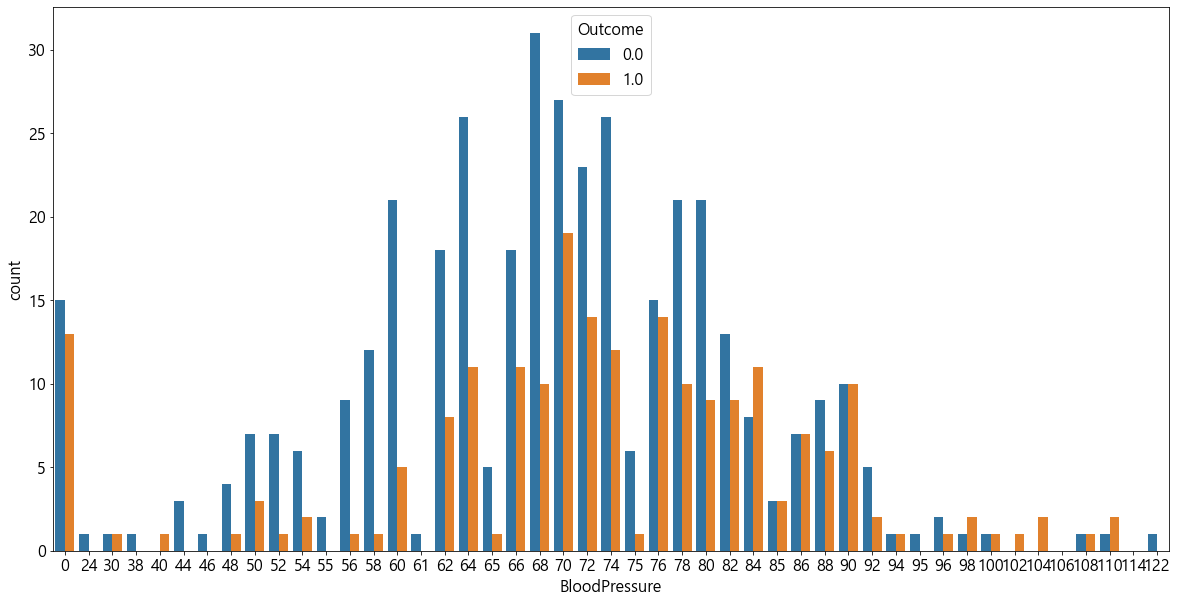

In [10]:
sns.countplot(data=data, x='BloodPressure', hue='Outcome')
plt.show()

혈압이 낮을 수록 당뇨병에 걸릴 확률이 낮다.

### SkinThickness
- 팔 삼두근 뒤쪽의 피하지방 측정값(두께 mm)

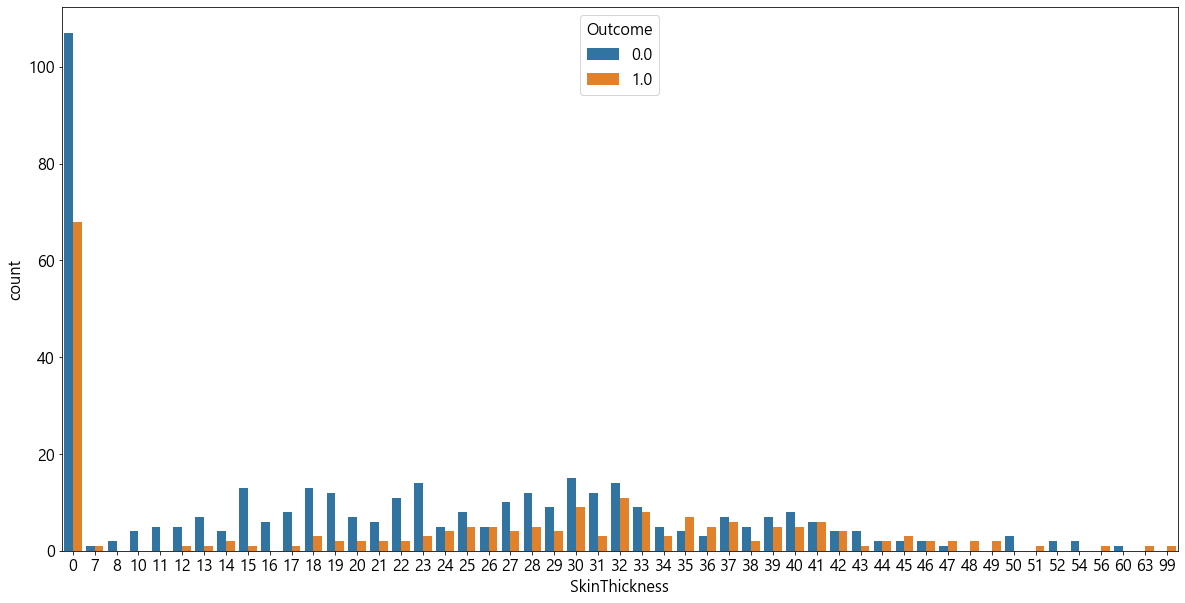

In [11]:
sns.countplot(data=data, x='SkinThickness', hue='Outcome')
plt.show()

피하지방이 얇은 사람일 수록 당뇨병에 걸릴 확률이 낮다.

### Insulin
- 혈청 인슐린

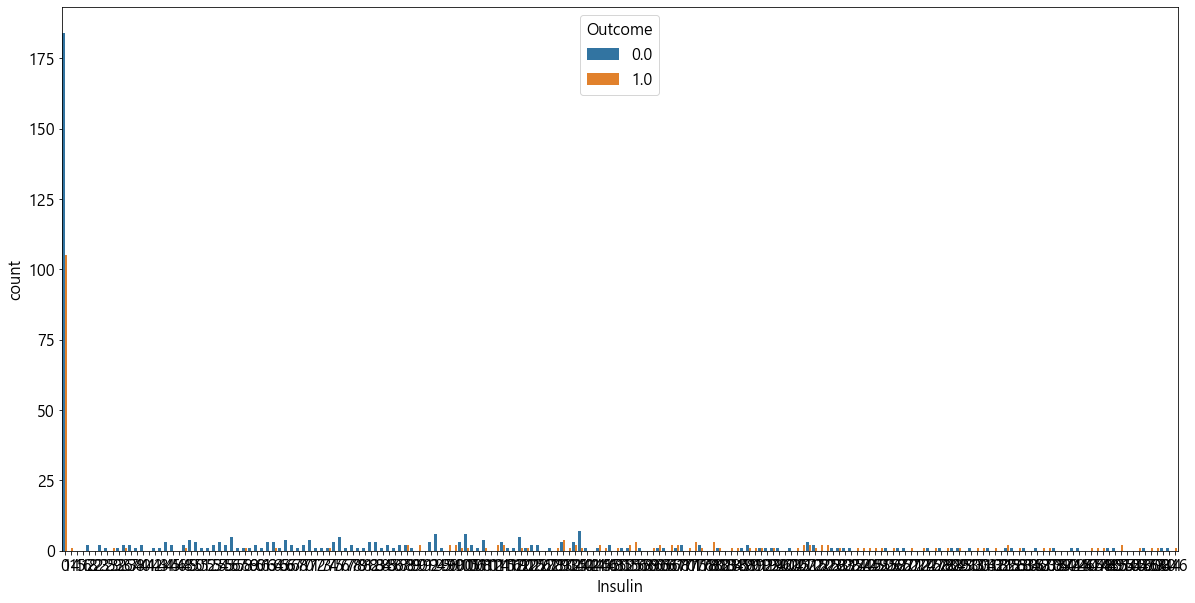

In [12]:
sns.countplot(data=data, x='Insulin', hue='Outcome')
plt.show()

인슐린 수치가 낮으면 당뇨병에 걸릴 확률이 낮아진다.

### BMI
- 체질량지수 (체중/키)^2

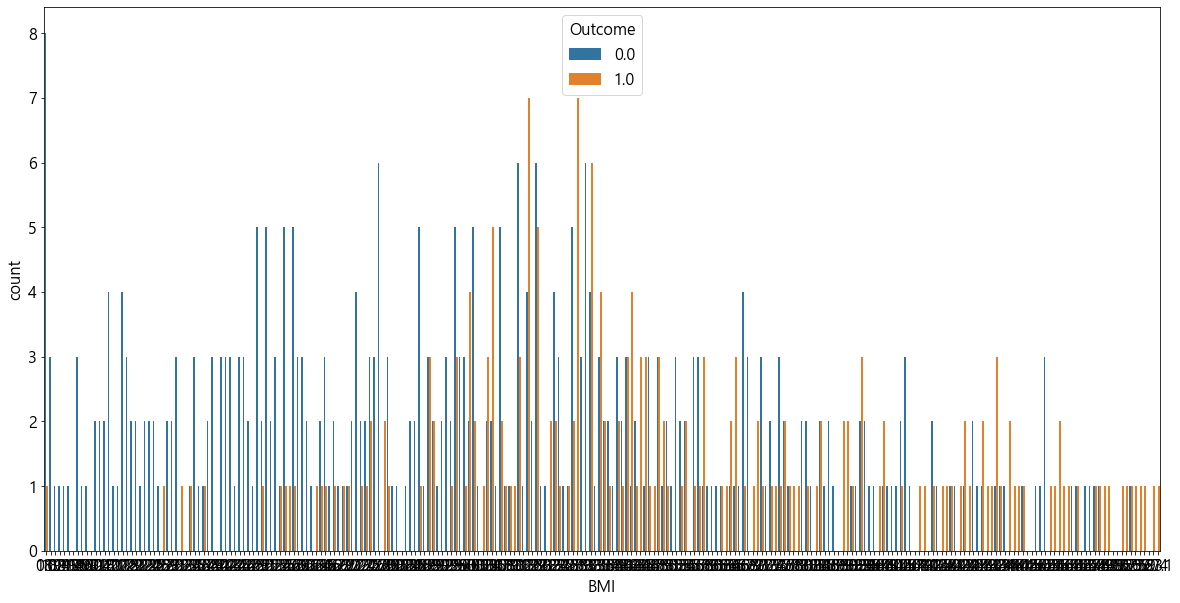

In [13]:
sns.countplot(data=data, x='BMI', hue='Outcome')
plt.show()

BMI 지수가 낮으면 당뇨병에 걸릴 확률이 낮다.

### DiabetesPedigreeFunction
- 당뇨 내력 가중치 값

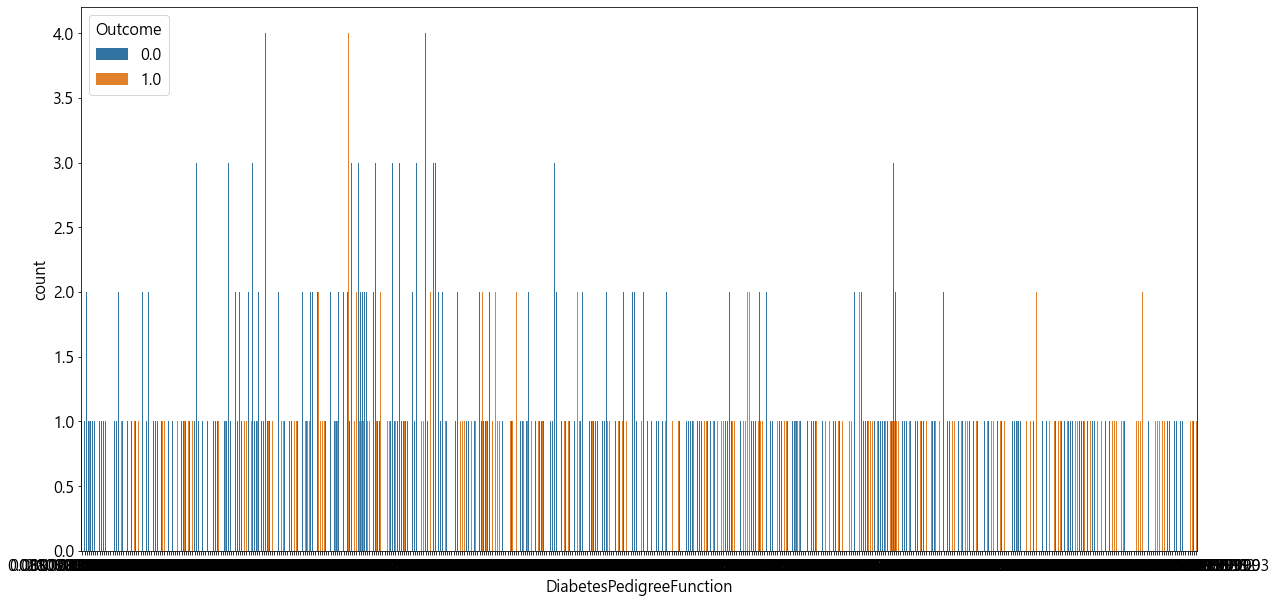

In [14]:
sns.countplot(data=data, x='DiabetesPedigreeFunction', hue='Outcome')
plt.show()

DiabetesPedigreeFunction 수치가 낮으면 당뇨병에 걸릴 확률이 낮아진다

### Age
- 나이

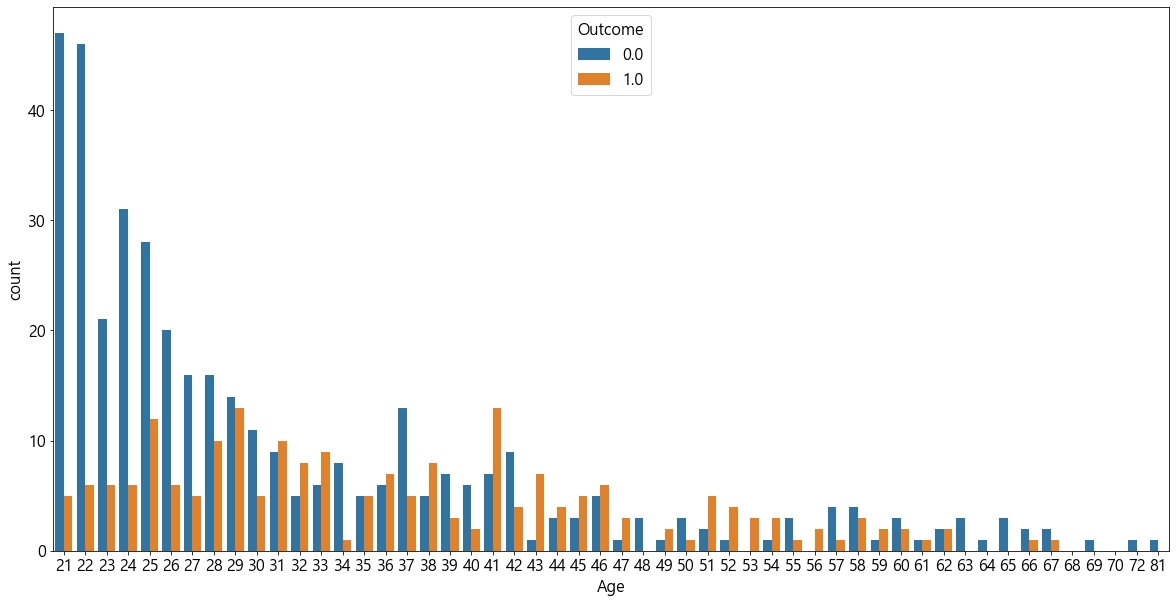

In [15]:
sns.countplot(data=data, x='Age', hue='Outcome')
plt.show()

아주 젊은 사람은 당뇨병에 걸릴 확률이 낮다.

### 이상치 처리

In [16]:
# Pregnancies (임신 횟수)
data['Pregnancies'].value_counts().sort_index()

# 임신 횟수의 0은 정상 데이터로 취급한다.

0     111
1     135
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
12      9
13     10
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [17]:
# Glucose : 포도당 수치
data['Glucose'].value_counts().sort_index()

0      5
44     1
56     1
57     2
61     1
      ..
195    2
196    3
197    4
198    1
199    1
Name: Glucose, Length: 136, dtype: int64

In [18]:
# # 포도당의 0을 처리한다.
# # outcome에 따른 포도당 평균 수치를 가져온다.
# a1 = data.groupby('Outcome')['Glucose'].mean()

# # outcome이 0인 사람들의 인덱스를 가져온다.
# idx1 = data.query('Outcome == 0 and Glucose == 0').index
# # outcome이 1인 사람들의 인덱스를 가져온다.
# idx2 = data.query('Outcome == 1 and Glucose == 0').index


# # 평균 값으로 채워준다.
# data.loc[idx1, 'Glucose'] = a1.loc[0]
# data.loc[idx2, 'Glucose'] = a1.loc[1]


# 전체 Glucose의 평균을 구한다.
a1 = data['Glucose'].mean()

# Glucose가 0인 사람들의 index를 가져온다.
idx = data.query('Glucose == 0').index

# 평균으로 채워준다.
data.loc[idx, 'Glucose'] = a1

data['Glucose'].value_counts().sort_index()

44.0     1
56.0     1
57.0     2
61.0     1
62.0     1
        ..
195.0    2
196.0    3
197.0    4
198.0    1
199.0    1
Name: Glucose, Length: 136, dtype: int64

In [19]:
# BloodPressure (혈압)
data['BloodPressure'].value_counts().sort_index()

0      35
24      1
30      2
38      1
40      1
44      4
46      2
48      5
50     13
52     11
54     11
55      2
56     12
58     21
60     37
61      1
62     34
64     43
65      7
66     30
68     45
70     57
72     44
74     52
75      8
76     39
78     45
80     40
82     30
84     23
85      6
86     21
88     25
90     22
92      8
94      6
95      1
96      4
98      3
100     3
102     1
104     2
106     3
108     2
110     3
114     1
122     1
Name: BloodPressure, dtype: int64

In [20]:
# 전체 BloodPressure의 평균을 구한다.
a1 = data['BloodPressure'].mean()

# BloodPressure가 0인 사람들의 index를 가져온다.
idx = data.query('BloodPressure == 0').index

# 평균으로 채워준다.
data.loc[idx, 'BloodPressure'] = a1

data['BloodPressure'].value_counts().sort_index()

24.000000      1
30.000000      2
38.000000      1
40.000000      1
44.000000      4
46.000000      2
48.000000      5
50.000000     13
52.000000     11
54.000000     11
55.000000      2
56.000000     12
58.000000     21
60.000000     37
61.000000      1
62.000000     34
64.000000     43
65.000000      7
66.000000     30
68.000000     45
69.105469     35
70.000000     57
72.000000     44
74.000000     52
75.000000      8
76.000000     39
78.000000     45
80.000000     40
82.000000     30
84.000000     23
85.000000      6
86.000000     21
88.000000     25
90.000000     22
92.000000      8
94.000000      6
95.000000      1
96.000000      4
98.000000      3
100.000000     3
102.000000     1
104.000000     2
106.000000     3
108.000000     2
110.000000     3
114.000000     1
122.000000     1
Name: BloodPressure, dtype: int64

In [21]:
# SkinThickness (피부피하지방 두께)
data['SkinThickness'].value_counts().sort_index()

0     227
7       2
8       2
10      5
11      6
12      7
13     11
14      6
15     14
16      6
17     14
18     20
19     18
20     13
21     10
22     16
23     22
24     12
25     16
26     16
27     23
28     20
29     17
30     27
31     19
32     31
33     20
34      8
35     15
36     14
37     16
38      7
39     18
40     16
41     15
42     11
43      6
44      5
45      6
46      8
47      4
48      4
49      3
50      3
51      1
52      2
54      2
56      1
60      1
63      1
99      1
Name: SkinThickness, dtype: int64

In [22]:
# 전체 SkinThickness의 평균을 구한다.
a1 = data['SkinThickness'].mean()

# SkinThickness가 0인 사람들의 index를 가져온다.
idx = data.query('SkinThickness == 0').index

# 평균으로 채워준다.
data.loc[idx, 'SkinThickness'] = a1

data['SkinThickness'].value_counts().sort_index()

7.000000       2
8.000000       2
10.000000      5
11.000000      6
12.000000      7
13.000000     11
14.000000      6
15.000000     14
16.000000      6
17.000000     14
18.000000     20
19.000000     18
20.000000     13
20.536458    227
21.000000     10
22.000000     16
23.000000     22
24.000000     12
25.000000     16
26.000000     16
27.000000     23
28.000000     20
29.000000     17
30.000000     27
31.000000     19
32.000000     31
33.000000     20
34.000000      8
35.000000     15
36.000000     14
37.000000     16
38.000000      7
39.000000     18
40.000000     16
41.000000     15
42.000000     11
43.000000      6
44.000000      5
45.000000      6
46.000000      8
47.000000      4
48.000000      4
49.000000      3
50.000000      3
51.000000      1
52.000000      2
54.000000      2
56.000000      1
60.000000      1
63.000000      1
99.000000      1
Name: SkinThickness, dtype: int64

In [23]:
# Insulin
data['Insulin'].value_counts().sort_index()

0      374
14       1
15       1
16       1
18       2
      ... 
579      1
600      1
680      1
744      1
846      1
Name: Insulin, Length: 186, dtype: int64

In [24]:
# 전체 Insulin의 평균을 구한다.
a1 = data['Insulin'].mean()

# Insulin가 0인 사람들의 index를 가져온다.
idx = data.query('Insulin == 0').index

# 평균으로 채워준다.
data.loc[idx, 'Insulin'] = a1

data['Insulin'].value_counts().sort_index()

14.0     1
15.0     1
16.0     1
18.0     2
22.0     1
        ..
579.0    1
600.0    1
680.0    1
744.0    1
846.0    1
Name: Insulin, Length: 186, dtype: int64

### BMI

In [25]:
data['BMI'].value_counts().sort_index()

0.0     11
18.2     3
18.4     1
19.1     1
19.3     1
        ..
53.2     1
55.0     1
57.3     1
59.4     1
67.1     1
Name: BMI, Length: 248, dtype: int64

In [26]:
# 전체 BMI의 평균을 구한다.
a1 = data['BMI'].mean()

# BMI가 0인 사람들의 index를 가져온다.
idx = data.query('BMI == 0').index

# 평균으로 채워준다.
data.loc[idx, 'BMI'] = a1

data['BMI'].value_counts().sort_index()

18.2    3
18.4    1
19.1    1
19.3    1
19.4    1
       ..
53.2    1
55.0    1
57.3    1
59.4    1
67.1    1
Name: BMI, Length: 248, dtype: int64

In [27]:
# DiabetesPedigreeFunction
data['DiabetesPedigreeFunction'].value_counts().sort_index()

0.078    1
0.084    1
0.085    2
0.088    2
0.089    1
        ..
1.893    1
2.137    1
2.288    1
2.329    1
2.420    1
Name: DiabetesPedigreeFunction, Length: 517, dtype: int64

In [28]:
# Age
data['Age'].value_counts().sort_index()

21    63
22    72
23    38
24    46
25    48
26    33
27    32
28    35
29    29
30    21
31    24
32    16
33    17
34    14
35    10
36    16
37    19
38    16
39    12
40    13
41    22
42    18
43    13
44     8
45    15
46    13
47     6
48     5
49     5
50     8
51     8
52     8
53     5
54     6
55     4
56     3
57     5
58     7
59     3
60     5
61     2
62     4
63     4
64     1
65     3
66     4
67     3
68     1
69     2
70     1
72     1
81     1
Name: Age, dtype: int64

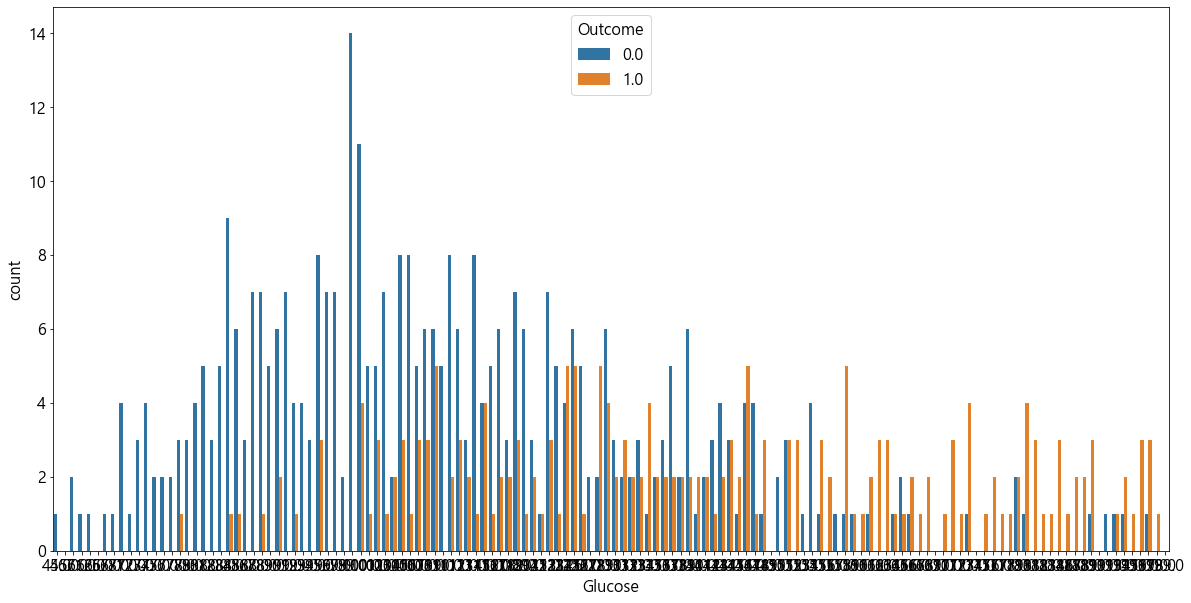

In [29]:
sns.countplot(data=data, x='Glucose', hue='Outcome')
plt.show()

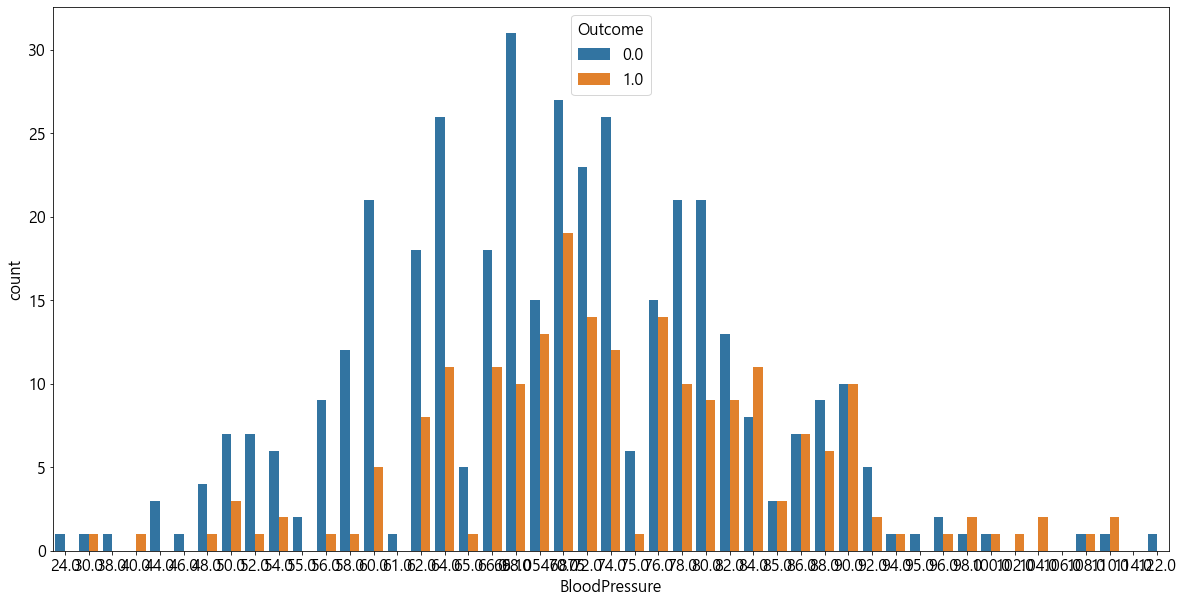

In [30]:
sns.countplot(data=data, x='BloodPressure', hue='Outcome')
plt.show()

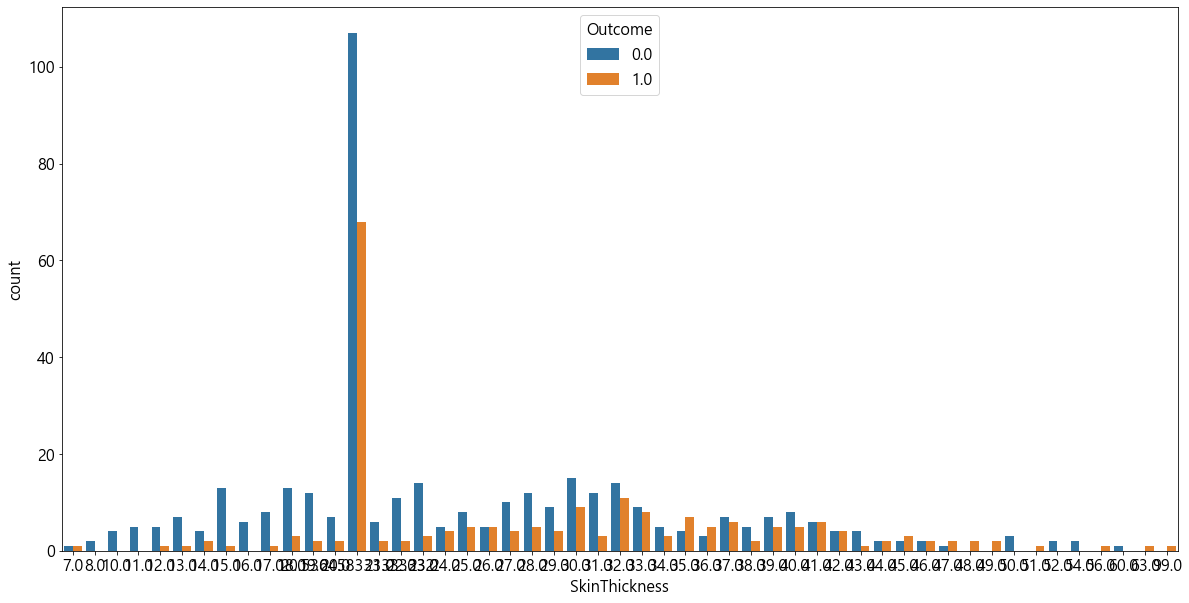

In [31]:
sns.countplot(data=data, x='SkinThickness', hue='Outcome')
plt.show()

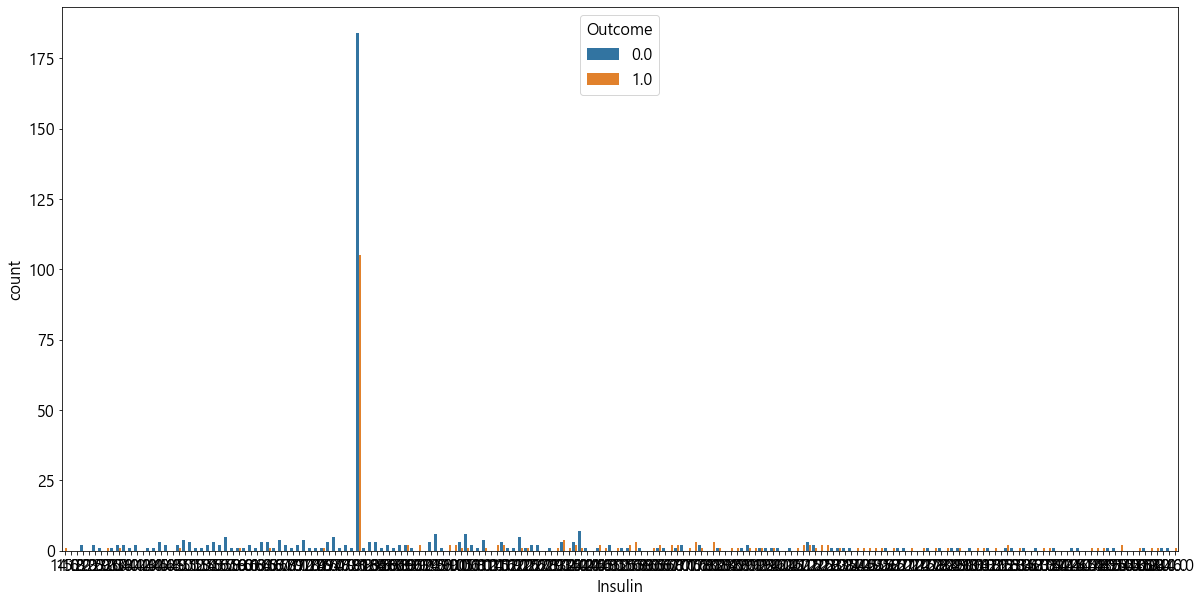

In [32]:
sns.countplot(data=data, x='Insulin', hue='Outcome')
plt.show()

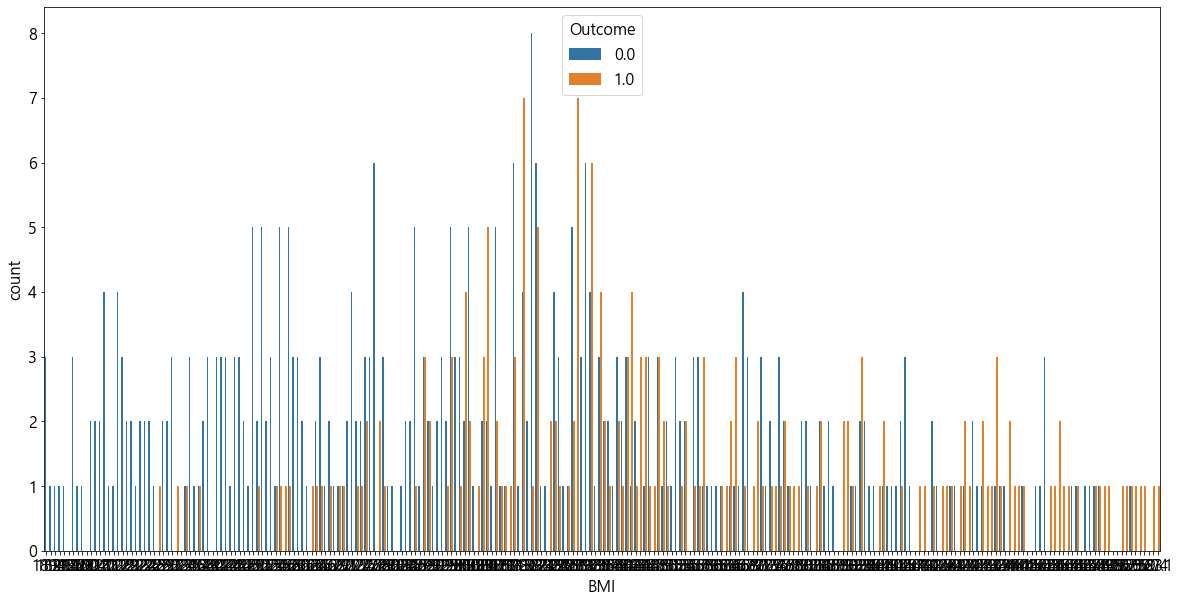

In [33]:
sns.countplot(data=data, x='BMI', hue='Outcome')
plt.show()

### 머신러닝을 위한 데이터 전처리

In [34]:
# 원본 유지를 위해 데이터 프레임을 복제한다.
df1 = data.copy()
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1.0
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0.0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1.0
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0.0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,NaN
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,NaN
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,NaN
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,NaN


In [35]:
# 불필요한 컬럼 제거
drop_list = ['Outcome']

df1.drop(drop_list, axis=1, inplace=True)
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [36]:
# 결측치 확인
df1.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [37]:
# 각 로우의 데이터를 정리한 데이터를 담는 작업을 한다.
temp = df1.copy()
temp['Outcome'] = data['Outcome']

In [38]:
# Pregnancies 값을 당뇨 양성율로 변경한다.
temp['Pregnancies'] = temp.groupby('Pregnancies')['Outcome'].transform('mean')
temp

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.270270,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1.0
1,0.188119,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0.0
2,0.593750,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1.0
3,0.188119,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0.0
4,0.354839,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...,...,...
763,0.437500,101.0,76.0,48.000000,180.000000,32.9,0.171,63,NaN
764,0.210526,122.0,70.0,27.000000,79.799479,36.8,0.340,27,NaN
765,0.408163,121.0,72.0,23.000000,112.000000,26.2,0.245,30,NaN
766,0.188119,126.0,60.0,20.536458,79.799479,30.1,0.349,47,NaN


In [39]:
# Glucose 값을 당뇨 양성율로 변경한다.
temp['Glucose'] = temp.groupby('Glucose')['Outcome'].transform('mean')
temp

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.270270,0.750000,72.0,35.000000,79.799479,33.6,0.627,50,1.0
1,0.188119,0.142857,66.0,29.000000,79.799479,26.6,0.351,31,0.0
2,0.593750,1.000000,64.0,20.536458,79.799479,23.3,0.672,32,1.0
3,0.188119,0.000000,66.0,23.000000,94.000000,28.1,0.167,21,0.0
4,0.354839,0.285714,40.0,35.000000,168.000000,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...,...,...
763,0.437500,0.166667,76.0,48.000000,180.000000,32.9,0.171,63,NaN
764,0.210526,0.300000,70.0,27.000000,79.799479,36.8,0.340,27,NaN
765,0.408163,0.500000,72.0,23.000000,112.000000,26.2,0.245,30,NaN
766,0.188119,0.166667,60.0,20.536458,79.799479,30.1,0.349,47,NaN


In [40]:
# BloodPressure 값을 당뇨 양성율로 변경한다.
temp['BloodPressure'] = temp.groupby('BloodPressure')['Outcome'].transform('mean')
temp

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.270270,0.750000,0.378378,35.000000,79.799479,33.6,0.627,50,1.0
1,0.188119,0.142857,0.379310,29.000000,79.799479,26.6,0.351,31,0.0
2,0.593750,1.000000,0.297297,20.536458,79.799479,23.3,0.672,32,1.0
3,0.188119,0.000000,0.379310,23.000000,94.000000,28.1,0.167,21,0.0
4,0.354839,0.285714,1.000000,35.000000,168.000000,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...,...,...
763,0.437500,0.166667,0.482759,48.000000,180.000000,32.9,0.171,63,NaN
764,0.210526,0.300000,0.413043,27.000000,79.799479,36.8,0.340,27,NaN
765,0.408163,0.500000,0.378378,23.000000,112.000000,26.2,0.245,30,NaN
766,0.188119,0.166667,0.192308,20.536458,79.799479,30.1,0.349,47,NaN


In [41]:
# SkinThickness 값을 당뇨 양성율로 변경한다.
temp['SkinThickness'] = temp.groupby('SkinThickness')['Outcome'].transform('mean')
temp

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.270270,0.750000,0.378378,0.636364,79.799479,33.6,0.627,50,1.0
1,0.188119,0.142857,0.379310,0.307692,79.799479,26.6,0.351,31,0.0
2,0.593750,1.000000,0.297297,0.388571,79.799479,23.3,0.672,32,1.0
3,0.188119,0.000000,0.379310,0.176471,94.000000,28.1,0.167,21,0.0
4,0.354839,0.285714,1.000000,0.636364,168.000000,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...,...,...
763,0.437500,0.166667,0.482759,1.000000,180.000000,32.9,0.171,63,NaN
764,0.210526,0.300000,0.413043,0.285714,79.799479,36.8,0.340,27,NaN
765,0.408163,0.500000,0.378378,0.176471,112.000000,26.2,0.245,30,NaN
766,0.188119,0.166667,0.192308,0.388571,79.799479,30.1,0.349,47,NaN


In [42]:
# Insulin 값을 당뇨 양성율로 변경한다.
temp['Insulin'] = temp.groupby('Insulin')['Outcome'].transform('mean')
temp

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.270270,0.750000,0.378378,0.636364,0.363322,33.6,0.627,50,1.0
1,0.188119,0.142857,0.379310,0.307692,0.363322,26.6,0.351,31,0.0
2,0.593750,1.000000,0.297297,0.388571,0.363322,23.3,0.672,32,1.0
3,0.188119,0.000000,0.379310,0.176471,0.000000,28.1,0.167,21,0.0
4,0.354839,0.285714,1.000000,0.636364,0.666667,43.1,2.288,33,1.0
...,...,...,...,...,...,...,...,...,...
763,0.437500,0.166667,0.482759,1.000000,1.000000,32.9,0.171,63,NaN
764,0.210526,0.300000,0.413043,0.285714,0.363322,36.8,0.340,27,NaN
765,0.408163,0.500000,0.378378,0.176471,NaN,26.2,0.245,30,NaN
766,0.188119,0.166667,0.192308,0.388571,0.363322,30.1,0.349,47,NaN


In [43]:
# BMI 값을 당뇨 양성율로 변경한다.
temp['BMI'] = temp.groupby('BMI')['Outcome'].transform('mean')
temp

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.270270,0.750000,0.378378,0.636364,0.363322,0.571429,0.627,50,1.0
1,0.188119,0.142857,0.379310,0.307692,0.363322,0.250000,0.351,31,0.0
2,0.593750,1.000000,0.297297,0.388571,0.363322,1.000000,0.672,32,1.0
3,0.188119,0.000000,0.379310,0.176471,0.000000,0.000000,0.167,21,0.0
4,0.354839,0.285714,1.000000,0.636364,0.666667,1.000000,2.288,33,1.0
...,...,...,...,...,...,...,...,...,...
763,0.437500,0.166667,0.482759,1.000000,1.000000,1.000000,0.171,63,NaN
764,0.210526,0.300000,0.413043,0.285714,0.363322,0.200000,0.340,27,NaN
765,0.408163,0.500000,0.378378,0.176471,NaN,0.000000,0.245,30,NaN
766,0.188119,0.166667,0.192308,0.388571,0.363322,0.285714,0.349,47,NaN


In [44]:
# DiabetesPedigreeFunction 값을 당뇨 양성율로 변경한다.
temp['DiabetesPedigreeFunction'] = temp.groupby('DiabetesPedigreeFunction')['Outcome'].transform('mean')
temp

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.270270,0.750000,0.378378,0.636364,0.363322,0.571429,1.0,50,1.0
1,0.188119,0.142857,0.379310,0.307692,0.363322,0.250000,0.0,31,0.0
2,0.593750,1.000000,0.297297,0.388571,0.363322,1.000000,1.0,32,1.0
3,0.188119,0.000000,0.379310,0.176471,0.000000,0.000000,0.0,21,0.0
4,0.354839,0.285714,1.000000,0.636364,0.666667,1.000000,1.0,33,1.0
...,...,...,...,...,...,...,...,...,...
763,0.437500,0.166667,0.482759,1.000000,1.000000,1.000000,NaN,63,NaN
764,0.210526,0.300000,0.413043,0.285714,0.363322,0.200000,0.5,27,NaN
765,0.408163,0.500000,0.378378,0.176471,NaN,0.000000,0.0,30,NaN
766,0.188119,0.166667,0.192308,0.388571,0.363322,0.285714,0.0,47,NaN


In [45]:
# Age 값을 당뇨 양성율로 변경한다.
temp['Age'] = temp.groupby('Age')['Outcome'].transform('mean')
temp

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.270270,0.750000,0.378378,0.636364,0.363322,0.571429,1.0,0.250000,1.0
1,0.188119,0.142857,0.379310,0.307692,0.363322,0.250000,0.0,0.526316,0.0
2,0.593750,1.000000,0.297297,0.388571,0.363322,1.000000,1.0,0.615385,1.0
3,0.188119,0.000000,0.379310,0.176471,0.000000,0.000000,0.0,0.096154,0.0
4,0.354839,0.285714,1.000000,0.636364,0.666667,1.000000,1.0,0.600000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.437500,0.166667,0.482759,1.000000,1.000000,1.000000,NaN,0.000000,NaN
764,0.210526,0.300000,0.413043,0.285714,0.363322,0.200000,0.5,0.238095,NaN
765,0.408163,0.500000,0.378378,0.176471,NaN,0.000000,0.0,0.312500,NaN
766,0.188119,0.166667,0.192308,0.388571,0.363322,0.285714,0.0,0.750000,NaN


In [46]:
# 양성율을 기반으로 통계값을 구한다.
# 평균
temp['Mean'] = 0
# 최대
temp['Max'] = 0
# 최소
temp['Min'] = 0
# 최대 - 최소
temp['Diff'] = 0

In [47]:
temp['Mean'] = temp.mean(axis=1)
temp['Max'] = temp.max(axis=1)
temp['Min'] = temp.min(axis=1)
temp['Diff'] = temp['Max'] - temp['Min']
temp

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Mean,Max,Min,Diff
0,0.270270,0.750000,0.378378,0.636364,0.363322,0.571429,1.0,0.250000,1.0,0.401520,1.000000,0.0,1.000000
1,0.188119,0.142857,0.379310,0.307692,0.363322,0.250000,0.0,0.526316,0.0,0.165970,0.526316,0.0,0.526316
2,0.593750,1.000000,0.297297,0.388571,0.363322,1.000000,1.0,0.615385,1.0,0.481410,1.000000,0.0,1.000000
3,0.188119,0.000000,0.379310,0.176471,0.000000,0.000000,0.0,0.096154,0.0,0.064620,0.379310,0.0,0.379310
4,0.354839,0.285714,1.000000,0.636364,0.666667,1.000000,1.0,0.600000,1.0,0.503353,1.000000,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.437500,0.166667,0.482759,1.000000,1.000000,1.000000,NaN,0.000000,NaN,0.371539,1.000000,0.0,1.000000
764,0.210526,0.300000,0.413043,0.285714,0.363322,0.200000,0.5,0.238095,NaN,0.209225,0.500000,0.0,0.500000
765,0.408163,0.500000,0.378378,0.176471,NaN,0.000000,0.0,0.312500,NaN,0.161410,0.500000,0.0,0.500000
766,0.188119,0.166667,0.192308,0.388571,0.363322,0.285714,0.0,0.750000,NaN,0.194558,0.750000,0.0,0.750000


In [48]:
# 구한 통계값들을 원본에 담아준다.
df1['Mean'] = temp['Mean']
df1['Max'] = temp['Max']
df1['Min'] = temp['Min']
df1['Diff'] = temp['Diff']
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Mean,Max,Min,Diff
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,0.401520,1.000000,0.0,1.000000
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0.165970,0.526316,0.0,0.526316
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,0.481410,1.000000,0.0,1.000000
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0.064620,0.379310,0.0,0.379310
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,0.503353,1.000000,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0.371539,1.000000,0.0,1.000000
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0.209225,0.500000,0.0,0.500000
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0.161410,0.500000,0.0,0.500000
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,0.194558,0.750000,0.0,0.750000


In [49]:
df1.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Mean                        0
Max                         0
Min                         0
Diff                        0
dtype: int64

### 학습 데이터를 준비한다.

In [50]:
# 데이터를 준비한다.
# 학습 데이터 개수
n_train = len(train_df)
# 예측 데이터 개수
n_test = len(test_df)

X_train = df1[:n_train]
y_train = train_df['Outcome']

display(X_train)
display(y_train)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Mean,Max,Min,Diff
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,0.401520,1.000000,0.0,1.000000
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0.165970,0.526316,0.0,0.526316
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,0.481410,1.000000,0.0,1.000000
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0.064620,0.379310,0.0,0.379310
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,0.503353,1.000000,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,188.0,82.0,14.000000,185.000000,32.0,0.682,22,0.435938,1.000000,0.0,1.000000
596,0,67.0,76.0,20.536458,79.799479,45.3,0.194,46,0.164227,0.545455,0.0,0.545455
597,1,89.0,24.0,19.000000,25.000000,27.8,0.559,21,0.032856,0.188119,0.0,0.188119
598,1,173.0,74.0,20.536458,79.799479,36.8,0.088,38,0.336245,1.000000,0.0,1.000000


0      1
1      0
2      1
3      0
4      1
      ..
595    1
596    0
597    0
598    1
599    0
Name: Outcome, Length: 600, dtype: int64

In [51]:
# 표준화 작업
scaler1 = StandardScaler()
scaler1.fit(X_train)
X_train = scaler1.transform(X_train)
X_train

array([[ 0.64896283,  0.87436879,  0.0077933 , ...,  1.27211701,
         0.        ,  1.27211701],
       [-0.83948403, -1.1766464 , -0.49278538, ..., -0.58027394,
         0.        , -0.58027394],
       [ 1.24434157,  2.01382167, -0.65964493, ...,  1.27211701,
         0.        ,  1.27211701],
       ...,
       [-0.83948403, -1.04642321, -3.99683609, ..., -1.90282809,
         0.        , -1.90282809],
       [-0.83948403,  1.68826371,  0.17465285, ...,  1.27211701,
         0.        ,  1.27211701],
       [-0.83948403, -0.39530728, -2.82881918, ..., -0.86093923,
         0.        , -0.86093923]])

### 기본 모델 사용하기

In [52]:
# 사용할 모델들
model1 = KNeighborsClassifier()
model2 = LogisticRegression()
model3 = SVC(probability=True)
model4 = DecisionTreeClassifier(random_state=1)
model5 = RandomForestClassifier(random_state=1)
model6 = AdaBoostClassifier(random_state=1)
model7 = GradientBoostingClassifier(random_state=1)
model8 = LGBMClassifier(random_state=1)
model9 = XGBClassifier(random_state=1, silent=True, verbosity=0)

model_list = (
    ('model1', model1), ('model2', model2), ('model3', model3),
    ('model4', model4), ('model5', model5), ('model6', model6),
    ('model7', model7), ('model8', model8), ('model9', model9),
)

model10 = VotingClassifier(estimators=model_list, voting='hard')
model11 = VotingClassifier(estimators=model_list, voting='soft')

In [53]:
# 사용할 알고리즘을 리스트에 담는다.
check_list = [
    model1, model2, model3, model4, model5, model6,
    model7, model8, model9, model10, model11
]
# 교차 검증 평균을 담을 리스트
score_list = []

In [54]:
# 교차 검증
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

for ml in check_list :
    score = cross_val_score(ml, X_train, y_train, scoring='f1', cv=kfold)
    score_list.append(score.mean())
    
score_list

[1.0,
 1.0,
 0.9975609756097562,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9974358974358974,
 1.0,
 1.0]

In [55]:
# 시각화를 위해 데이터 프레임을 생성한다.
results_df = pd.DataFrame({
    'Model' : ['KNN', 'LogisticRegression', 'SVC',
               'DecisionTree', 'RandomForest', 'AdaBoost',
               'GradianBoost', 'LGBM', 'XGBoost', 
               'Voting(Hard)', 'Voting(Soft)'],
    'Score' : score_list
})

# score 기준으로 정렬
results_df.sort_values(by='Score', ascending=False, inplace=True)
# 인덱스를 리셋한다.
results_df.reset_index(drop=True, inplace=True)
results_df

,Model,Score
0,KNN,1.000000
1,LogisticRegression,1.000000
2,DecisionTree,1.000000
3,RandomForest,1.000000
4,AdaBoost,1.000000
5,GradianBoost,1.000000
6,LGBM,1.000000
7,Voting(Hard),1.000000
8,Voting(Soft),1.000000
9,SVC,0.997561


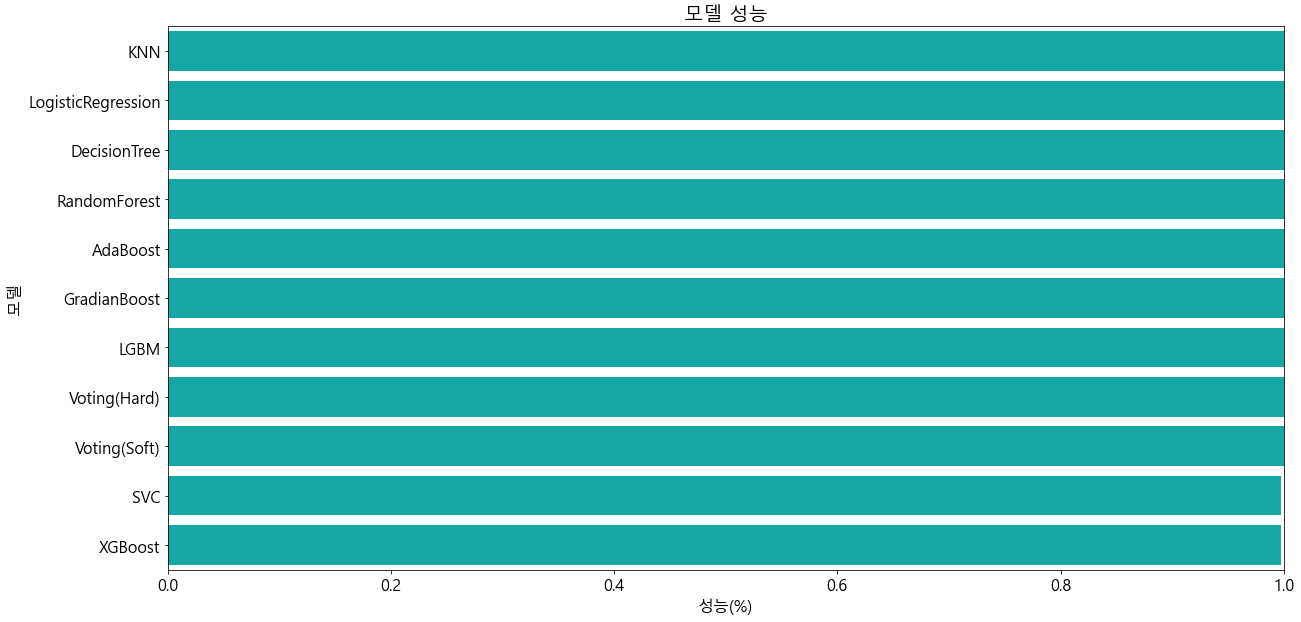

In [56]:
# 성능 평가 결과를 시각화한다.
sns.barplot(data=results_df, x='Score', y='Model', color='c')

plt.title('모델 성능')
plt.xlabel('성능(%)')
plt.ylabel('모델')
plt.xlim(0, 1)

plt.show()

### 하이퍼 파라미터 튜닝

In [57]:
# KNN
params = {
    # 'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    'n_neighbors' : list(range(1, 11))
}

# 사용할 모델 객체를 생성한다.
model1 = KNeighborsClassifier()

# 최적의 하이퍼 파라미터를 찾는다
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf1 = GridSearchCV(model1, param_grid=params, scoring='f1', cv=kfold)
grid_clf1.fit(X_train, y_train)

# 결과출력
print(f'최적의 하이퍼 파라미터 : {grid_clf1.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf1.best_score_}')

최적의 하이퍼 파라미터 : {'n_neighbors': 5}
최적의 모델 평균 성능 : 1.0


In [58]:
# LogisticRegression 
# penalty : 규제의 종류(l1, l2, elasticnet, none)
# C : 규제의 강도 
params = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model2 = LogisticRegression()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf2 = GridSearchCV(model2, param_grid=params, scoring='f1', cv=kfold)
grid_clf2.fit(X_train, y_train)
print(f'최적의 하이퍼 파라미터 : {grid_clf2.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf2.best_score_}')

최적의 하이퍼 파라미터 : {'C': 0.0001, 'penalty': 'none'}
최적의 모델 평균 성능 : 1.0


In [59]:
# SVM(SVC)
# SVM은 penalty가 l2로 고정되어 있다
# C : 규제의 강도 
params = {
    'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model3 = SVC()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf3 = GridSearchCV(model3, param_grid=params, scoring='f1', cv=kfold)
grid_clf3.fit(X_train, y_train)
print(f'최적의 하이퍼 파라미터 : {grid_clf3.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf3.best_score_}')

최적의 하이퍼 파라미터 : {'C': 0.1}
최적의 모델 평균 성능 : 0.9975609756097562


In [60]:
# DecisionTree
# max_depth : 생성될 최대 질문 깊이, None은 무한대.
params = {
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model4 = DecisionTreeClassifier(random_state=1)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf4 = GridSearchCV(model4, param_grid=params, scoring='f1', cv=kfold)
grid_clf4.fit(X_train, y_train)
print(f'최적의 하이퍼 파라미터 : {grid_clf4.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf4.best_score_}')

최적의 하이퍼 파라미터 : {'max_depth': None}
최적의 모델 평균 성능 : 1.0


In [61]:
# RandomForest
# n_estimators : 사용할 트리의 개수
# max_depth : 생성될 최대 질문 깊이, None은 무한대.
params = {
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model5 = RandomForestClassifier(random_state=1)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf5 = GridSearchCV(model5, param_grid=params, scoring='f1', cv=kfold)
grid_clf5.fit(X_train, y_train)

print(f'최적의 하이퍼 파라미터 : {grid_clf5.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf5.best_score_}')

최적의 하이퍼 파라미터 : {'max_depth': None, 'n_estimators': 50}
최적의 모델 평균 성능 : 1.0


In [62]:
# AdaBoost
# learning_rate : 학습률
# n_estimators : 사용할 트리의 개수
# max_depth : 생성될 최대 질문 깊이, None은 무한대.
params = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    # 'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model6 = AdaBoostClassifier(random_state=1)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf6 = GridSearchCV(model6, param_grid=params, scoring='f1', cv=kfold)
grid_clf6.fit(X_train, y_train)

print(f'최적의 하이퍼 파라미터 : {grid_clf6.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf6.best_score_}')

최적의 하이퍼 파라미터 : {'learning_rate': 0.0001, 'n_estimators': 50}
최적의 모델 평균 성능 : 1.0


In [63]:
# GradianBoosting
# learning_rate : 학습률
# n_estimators : 사용할 트리의 개수
# max_depth : 생성될 최대 질문 깊이, None은 무한대.
params = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    # 'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model7 = GradientBoostingClassifier(random_state=1)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf7 = GridSearchCV(model7, param_grid=params, scoring='f1', cv=kfold)
grid_clf7.fit(X_train, y_train)

print(f'최적의 하이퍼 파라미터 : {grid_clf7.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf7.best_score_}')

최적의 하이퍼 파라미터 : {'learning_rate': 0.01, 'n_estimators': 100}
최적의 모델 평균 성능 : 1.0


In [64]:
# Light GBM
# learning_rate : 학습률
# n_estimators : 사용할 트리의 개수
# max_depth : 생성될 최대 질문 깊이, None은 무한대.
params = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    # 'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model8 = LGBMClassifier(random_state=1)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf8 = GridSearchCV(model8, param_grid=params, scoring='f1', cv=kfold)
grid_clf8.fit(X_train, y_train)

print(f'최적의 하이퍼 파라미터 : {grid_clf8.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf8.best_score_}')

최적의 하이퍼 파라미터 : {'learning_rate': 0.01, 'n_estimators': 150}
최적의 모델 평균 성능 : 1.0


In [65]:
# XGBoost
# booster : 내부에 사용할 알고리즘
# learning_rate : 학습률
# n_estimators : 사용할 트리의 개수
# max_depth : 생성될 최대 질문 깊이, None은 무한대.
params = {
    'booster' : ['gbtree', 'gblinear'],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    # 'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model9 = XGBClassifier(silent=True, verbosity=0, random_state=1)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf9 = GridSearchCV(model9, param_grid=params, scoring='f1', cv=kfold)
grid_clf9.fit(X_train, y_train)

print(f'최적의 하이퍼 파라미터 : {grid_clf9.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf9.best_score_}')

최적의 하이퍼 파라미터 : {'booster': 'gblinear', 'learning_rate': 0.01, 'n_estimators': 200}
최적의 모델 평균 성능 : 1.0


In [66]:
# voting

# SVC 에서 확률을 확인할 수 있도록 설정한다.
grid_clf3.best_estimator_.probability = True

model_list = (
    ('model1', grid_clf1.best_estimator_), 
    ('model2', grid_clf2.best_estimator_),
    ('model3', grid_clf3.best_estimator_),
    ('model4', grid_clf4.best_estimator_),
    ('model5', grid_clf5.best_estimator_),
    ('model6', grid_clf6.best_estimator_),
    ('model7', grid_clf7.best_estimator_),
    ('model8', grid_clf8.best_estimator_),
    ('model9', grid_clf9.best_estimator_),
)

model10 = VotingClassifier(estimators=model_list, voting='hard')
model11 = VotingClassifier(estimators=model_list, voting='soft')

In [67]:
# voting 모델 교차 검증
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

r10 = cross_val_score(model10, X_train, y_train, scoring='f1', cv=kfold)
r11 = cross_val_score(model11, X_train, y_train, scoring='f1', cv=kfold)

In [68]:
# 시각화를 위한 데이터프레임을 생성한다.

score_list = [
    grid_clf1.best_score_, grid_clf2.best_score_, grid_clf3.best_score_,
    grid_clf4.best_score_, grid_clf5.best_score_, grid_clf6.best_score_,
    grid_clf7.best_score_, grid_clf8.best_score_, grid_clf9.best_score_,
    r10.mean(), r11.mean()
]

results_df = pd.DataFrame({
    'Model' : ['KNN', 'LogisticRegression', 'SVC',
               'DecisionTree', 'RandomForest', 'AdaBoost',
               'GradianBoost', 'LGBM', 'XGBoost', 
               'Voting(Hard)', 'Voting(Soft)'],
    'Score' : score_list
})

# score 기준으로 정렬
results_df.sort_values(by='Score', ascending=False, inplace=True)
# 인덱스를 리셋한다.
results_df.reset_index(drop=True, inplace=True)
results_df

,Model,Score
0,KNN,1.000000
1,LogisticRegression,1.000000
2,DecisionTree,1.000000
3,RandomForest,1.000000
4,AdaBoost,1.000000
5,GradianBoost,1.000000
6,LGBM,1.000000
7,XGBoost,1.000000
8,Voting(Hard),1.000000
9,Voting(Soft),1.000000


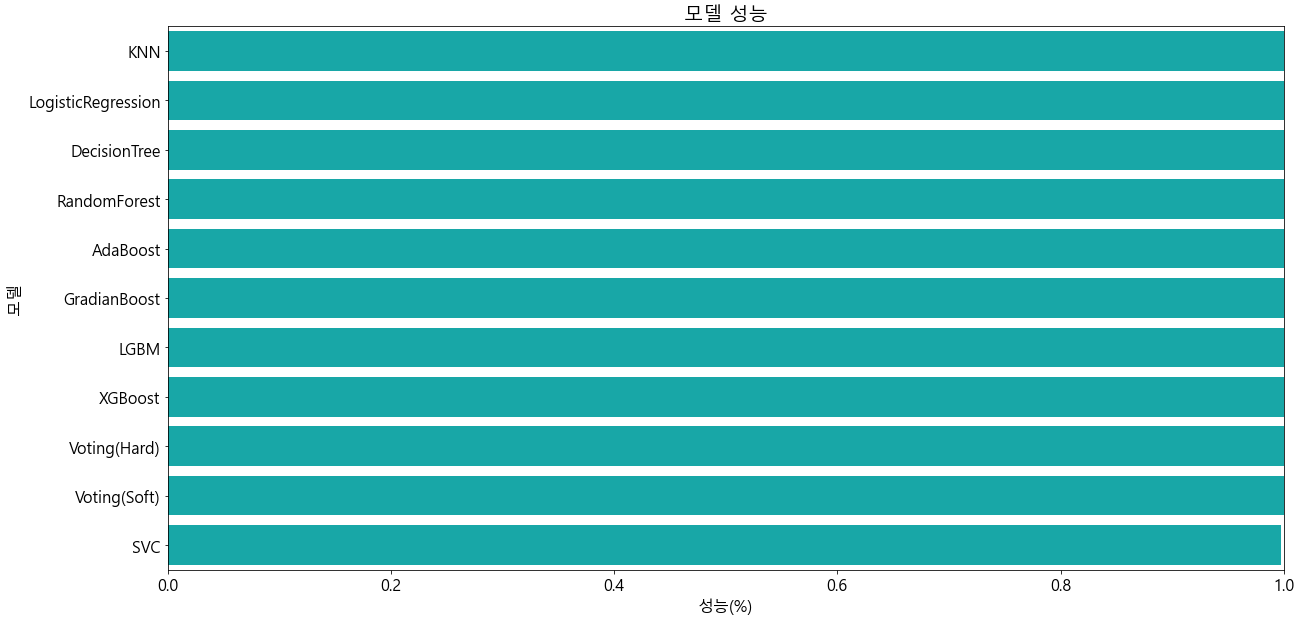

In [69]:
# 성능 평가 결과를 시각화한다.
sns.barplot(data=results_df, x='Score', y='Model', color='c')

plt.title('모델 성능')
plt.xlabel('성능(%)')
plt.ylabel('모델')
plt.xlim(0, 1)

plt.show()

### 전체 데이터를 학습과 검증으로 나눠 최종 평가를 실시한다.

In [70]:
# 각 모델에서 하이퍼 파라미터가 튜닝된 모델을 추출한다.
model1 = grid_clf1.best_estimator_
model2 = grid_clf2.best_estimator_
model3 = grid_clf3.best_estimator_
model4 = grid_clf4.best_estimator_
model5 = grid_clf5.best_estimator_
model6 = grid_clf6.best_estimator_
model7 = grid_clf7.best_estimator_
model8 = grid_clf8.best_estimator_
model9 = grid_clf9.best_estimator_

In [71]:
# 학습용과 검증용으로 나눈다.
x1, x2, y1, y2 = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

In [72]:
# 학습용 데이터로 학습을 시킨다.
model1.fit(x1, y1)
model2.fit(x1, y1)
model3.fit(x1, y1)
model4.fit(x1, y1)
model5.fit(x1, y1)
model6.fit(x1, y1)
model7.fit(x1, y1)
model8.fit(x1, y1)
model9.fit(x1, y1)
model10.fit(x1, y1)
model11.fit(x1, y1)

VotingClassifier(estimators=(('model1', KNeighborsClassifier()),
                             ('model2',
                              LogisticRegression(C=0.0001, penalty='none')),
                             ('model3', SVC(C=0.1, probability=True)),
                             ('model4', DecisionTreeClassifier(random_state=1)),
                             ('model5',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=1)),
                             ('model6',
                              AdaBoostClassifier(learning_rate=0.0001,
                                                 random_state=1)),
                             ('model7',...
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=0.01,
                                            max

In [73]:
# 검증 데이터를 통해 예측 결과를 가져온다.
y_pred1 = model1.predict(x2)
y_pred2 = model2.predict(x2)
y_pred3 = model3.predict(x2)
y_pred4 = model4.predict(x2)
y_pred5 = model5.predict(x2)
y_pred6 = model6.predict(x2)
y_pred7 = model7.predict(x2)
y_pred8 = model8.predict(x2)
y_pred9 = model9.predict(x2)
y_pred10 = model10.predict(x2)
y_pred11 = model11.predict(x2)

In [74]:
# 진짜 결과와 비교해서 평가를 실시한다.
r1 = f1_score(y2, y_pred1)
r2 = f1_score(y2, y_pred2)
r3 = f1_score(y2, y_pred3)
r4 = f1_score(y2, y_pred4)
r5 = f1_score(y2, y_pred5)
r6 = f1_score(y2, y_pred6)
r7 = f1_score(y2, y_pred7)
r8 = f1_score(y2, y_pred8)
r9 = f1_score(y2, y_pred9)
r10 = f1_score(y2, y_pred10)
r11 = f1_score(y2, y_pred11)

In [75]:
results_df = pd.DataFrame({
    'Model' : ['KNN', 'LogisticRegression', 'SVC',
               'DecisionTree', 'RandomForest', 'AdaBoost',
               'GradianBoost', 'LGBM', 'XGBoost', 
               'Voting(Hard)', 'Voting(Soft)'],
    'Score' : [r1.mean(), r2.mean(), r3.mean(), r4.mean(),
               r5.mean(), r6.mean(), r7.mean(), r8.mean(),
               r9.mean(), r10.mean(), r11.mean()]
})

# score 기준으로 정렬
results_df.sort_values(by='Score', ascending=False, inplace=True)
# 인덱스를 리셋한다.
results_df.reset_index(drop=True, inplace=True)
results_df

,Model,Score
0,KNN,1.0
1,LogisticRegression,1.0
2,SVC,1.0
3,DecisionTree,1.0
4,RandomForest,1.0
5,AdaBoost,1.0
6,GradianBoost,1.0
7,LGBM,1.0
8,XGBoost,1.0
9,Voting(Hard),1.0


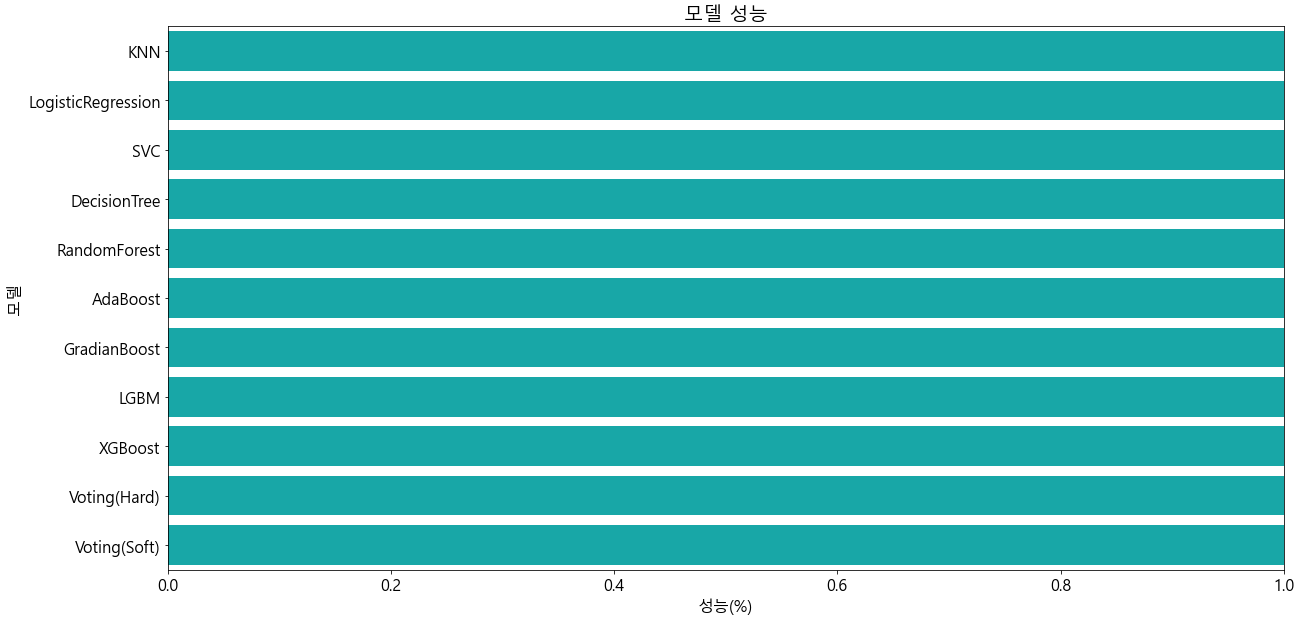

In [76]:
# 성능 평가 결과를 시각화한다.
sns.barplot(data=results_df, x='Score', y='Model', color='c')

plt.title('모델 성능')
plt.xlabel('성능(%)')
plt.ylabel('모델')
plt.xlim(0, 1)

plt.show()

### 모든 모델에 모든 데이터를 학습시킨다

In [77]:
model1.fit(X_train ,y_train)
model2.fit(X_train ,y_train)
model3.fit(X_train ,y_train)
model4.fit(X_train ,y_train)
model5.fit(X_train ,y_train)
model6.fit(X_train ,y_train)
model7.fit(X_train ,y_train)
model8.fit(X_train ,y_train)
model9.fit(X_train ,y_train)
model10.fit(X_train ,y_train)
model11.fit(X_train ,y_train)

VotingClassifier(estimators=(('model1', KNeighborsClassifier()),
                             ('model2',
                              LogisticRegression(C=0.0001, penalty='none')),
                             ('model3', SVC(C=0.1, probability=True)),
                             ('model4', DecisionTreeClassifier(random_state=1)),
                             ('model5',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=1)),
                             ('model6',
                              AdaBoostClassifier(learning_rate=0.0001,
                                                 random_state=1)),
                             ('model7',...
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=0.01,
                                            max

### 결과를 예측 한다

In [78]:
X_test = df1[n_train:]
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Mean,Max,Min,Diff
600,1,108.0,88.000000,19.000000,79.799479,27.1,0.400,24,0.189981,0.500000,0.0,0.500000
601,6,96.0,69.105469,20.536458,79.799479,23.7,0.190,28,0.155922,0.464286,0.0,0.464286
602,1,124.0,74.000000,36.000000,79.799479,27.8,0.100,30,0.214571,0.625000,0.0,0.625000
603,7,150.0,78.000000,29.000000,126.000000,35.2,0.692,54,0.183341,0.750000,0.0,0.750000
604,4,183.0,69.105469,20.536458,79.799479,28.4,0.212,36,0.342208,1.000000,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.000000,48.000000,180.000000,32.9,0.171,63,0.371539,1.000000,0.0,1.000000
764,2,122.0,70.000000,27.000000,79.799479,36.8,0.340,27,0.209225,0.500000,0.0,0.500000
765,5,121.0,72.000000,23.000000,112.000000,26.2,0.245,30,0.161410,0.500000,0.0,0.500000
766,1,126.0,60.000000,20.536458,79.799479,30.1,0.349,47,0.194558,0.750000,0.0,0.750000


In [79]:
# 표준화 
X_test = scaler1.transform(X_test)
X_test

array([[-0.83948403, -0.42786307,  1.34266976, ..., -0.68318455,
         0.        , -0.68318455],
       [ 0.64896283, -0.81853263, -0.2336968 , ..., -0.82284894,
         0.        , -0.82284894],
       [-0.83948403,  0.09302967,  0.17465285, ..., -0.19435916,
         0.        , -0.19435916],
       ...,
       [ 0.35127346, -0.00463772,  0.0077933 , ..., -0.68318455,
         0.        , -0.68318455],
       [-0.83948403,  0.15814127, -0.99336405, ...,  0.29446623,
         0.        ,  0.29446623],
       [-0.83948403, -0.91620002, -0.15906626, ..., -0.29212424,
         0.        , -0.29212424]])

In [80]:
# 예측 결과를 추출한다.
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)
y_pred4 = model4.predict(X_test)
y_pred5 = model5.predict(X_test)
y_pred6 = model6.predict(X_test)
y_pred7 = model7.predict(X_test)
y_pred8 = model8.predict(X_test)
y_pred9 = model9.predict(X_test)
y_pred10 = model10.predict(X_test)
y_pred11 = model11.predict(X_test)

In [81]:
y_pred_proba1 = model1.predict_proba(X_test)
y_pred_proba2 = model2.predict_proba(X_test)
y_pred_proba3 = model3.predict_proba(X_test)
y_pred_proba4 = model4.predict_proba(X_test)
y_pred_proba5 = model5.predict_proba(X_test)
y_pred_proba6 = model6.predict_proba(X_test)
y_pred_proba7 = model7.predict_proba(X_test)
y_pred_proba8 = model8.predict_proba(X_test)
y_pred_proba9 = model9.predict_proba(X_test)
# y_pred_proba10 = model10.predict_proba(X_test)
y_pred_proba11 = model11.predict_proba(X_test)

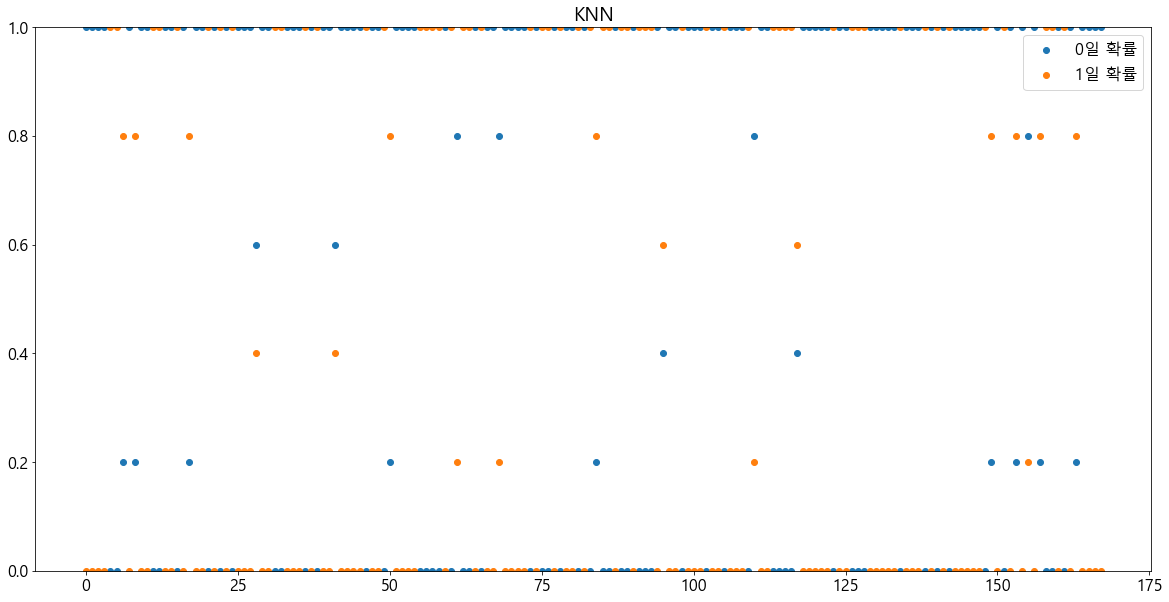

In [82]:
# 0일 확률들
a10 = y_pred_proba1[:, 0]
# 1일 확률들
a11 = y_pred_proba1[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.ylim(0, 1)
plt.legend()
plt.title('KNN')
plt.show()

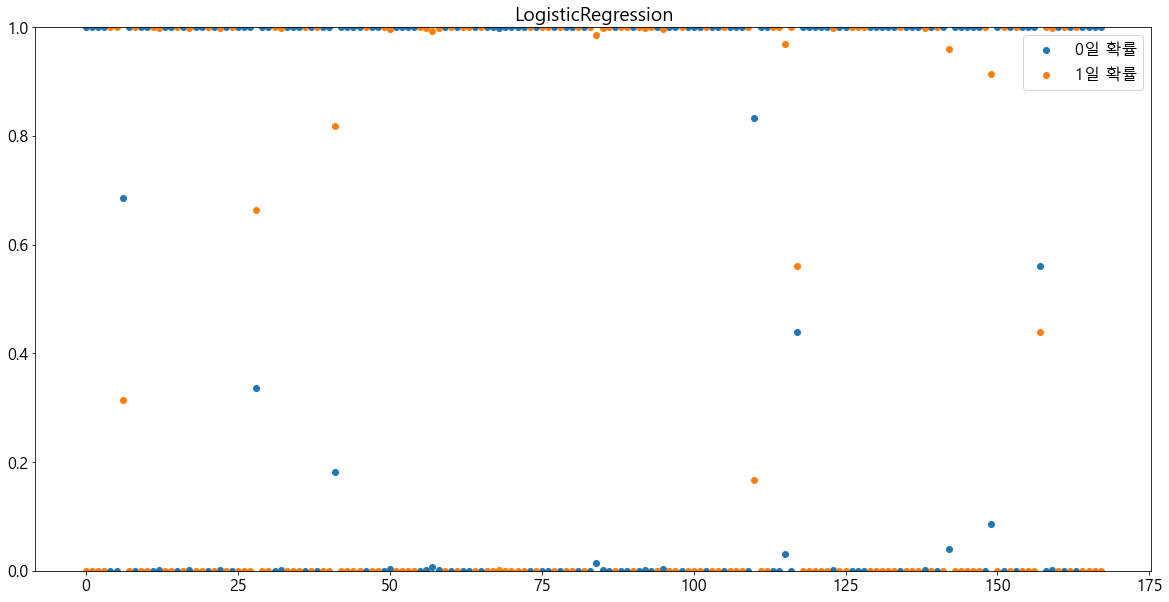

In [83]:
# 0일 확률들
a10 = y_pred_proba2[:, 0]
# 1일 확률들
a11 = y_pred_proba2[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.ylim(0, 1)
plt.legend()
plt.title('LogisticRegression')
plt.show()

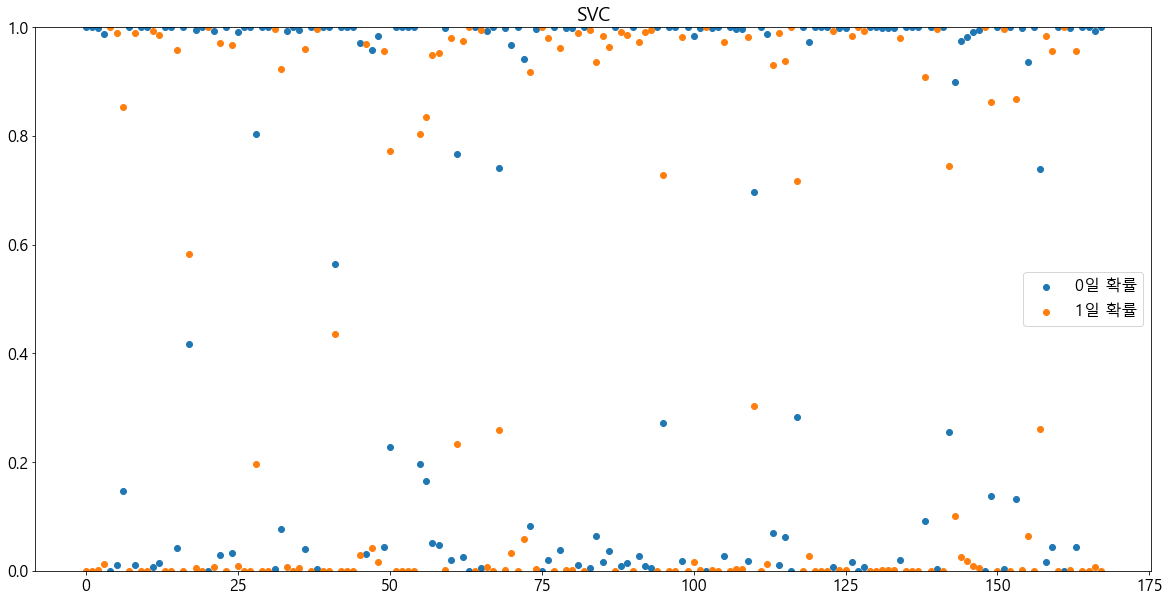

In [84]:
# 0일 확률들
a10 = y_pred_proba3[:, 0]
# 1일 확률들
a11 = y_pred_proba3[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.ylim(0, 1)
plt.legend()
plt.title('SVC')
plt.show()

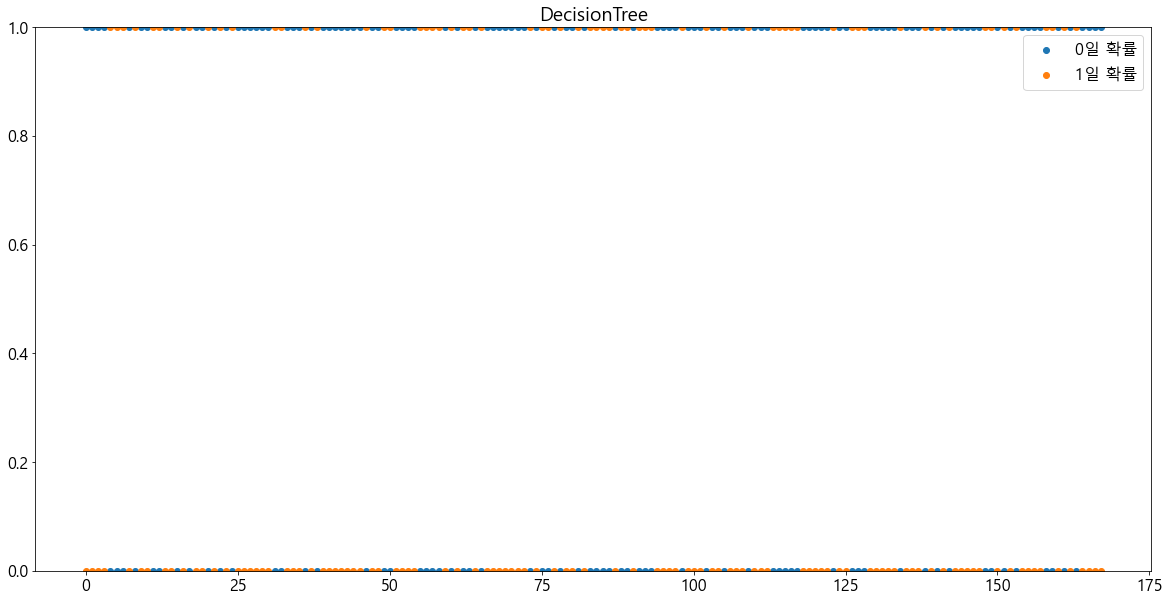

In [85]:
# 0일 확률들
a10 = y_pred_proba4[:, 0]
# 1일 확률들
a11 = y_pred_proba4[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.ylim(0, 1)
plt.legend()
plt.title('DecisionTree')
plt.show()

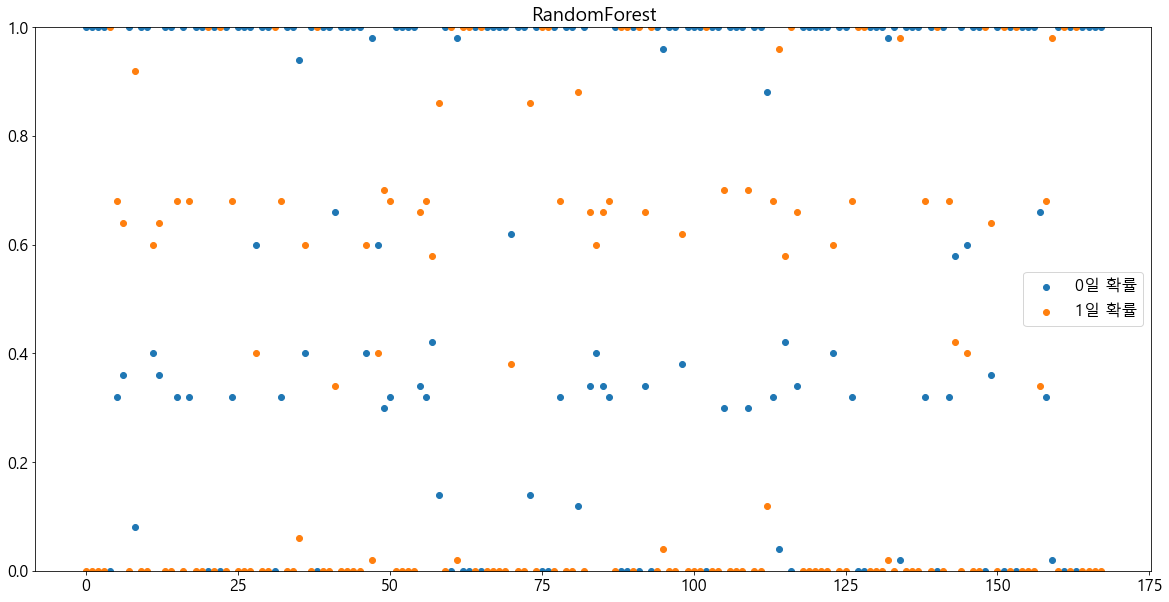

In [86]:
# 0일 확률들
a10 = y_pred_proba5[:, 0]
# 1일 확률들
a11 = y_pred_proba5[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.ylim(0, 1)
plt.legend()
plt.title('RandomForest')
plt.show()

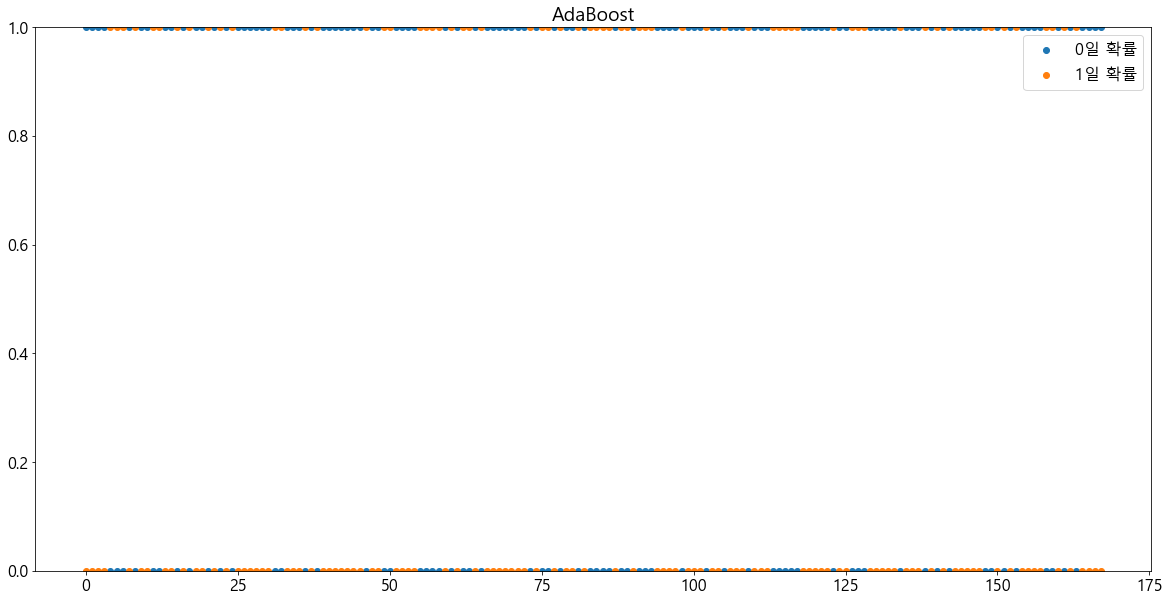

In [87]:
# 0일 확률들
a10 = y_pred_proba6[:, 0]
# 1일 확률들
a11 = y_pred_proba6[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.ylim(0, 1)
plt.legend()
plt.title('AdaBoost')
plt.show()

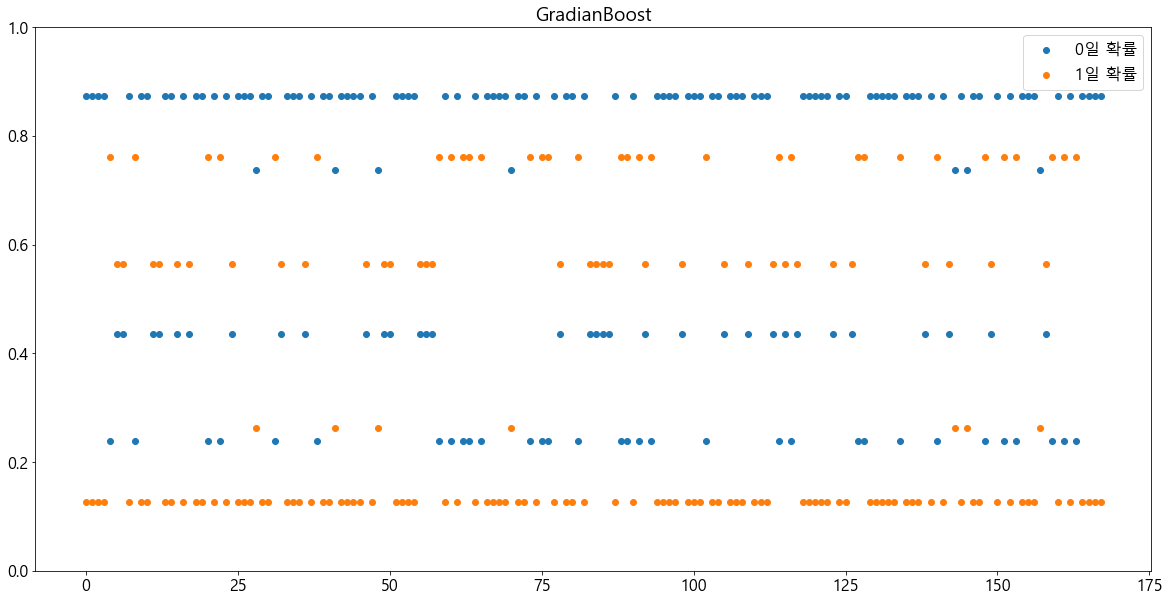

In [88]:
# 0일 확률들
a10 = y_pred_proba7[:, 0]
# 1일 확률들
a11 = y_pred_proba7[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.ylim(0, 1)
plt.legend()
plt.title('GradianBoost')
plt.show()

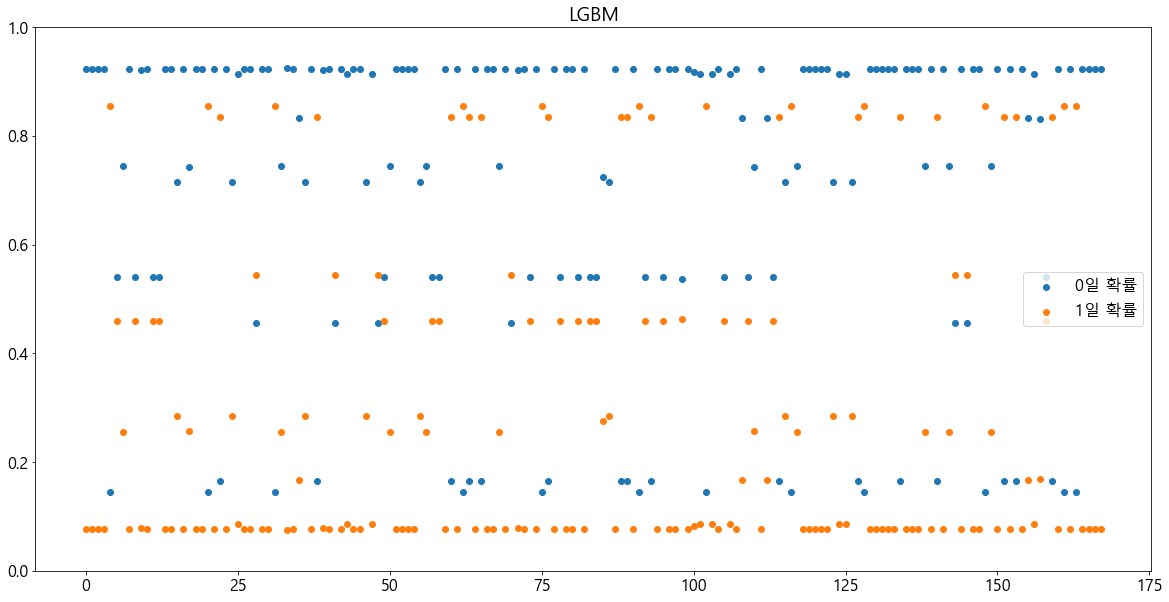

In [89]:
# 0일 확률들
a10 = y_pred_proba8[:, 0]
# 1일 확률들
a11 = y_pred_proba8[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.ylim(0, 1)
plt.legend()
plt.title('LGBM')
plt.show()

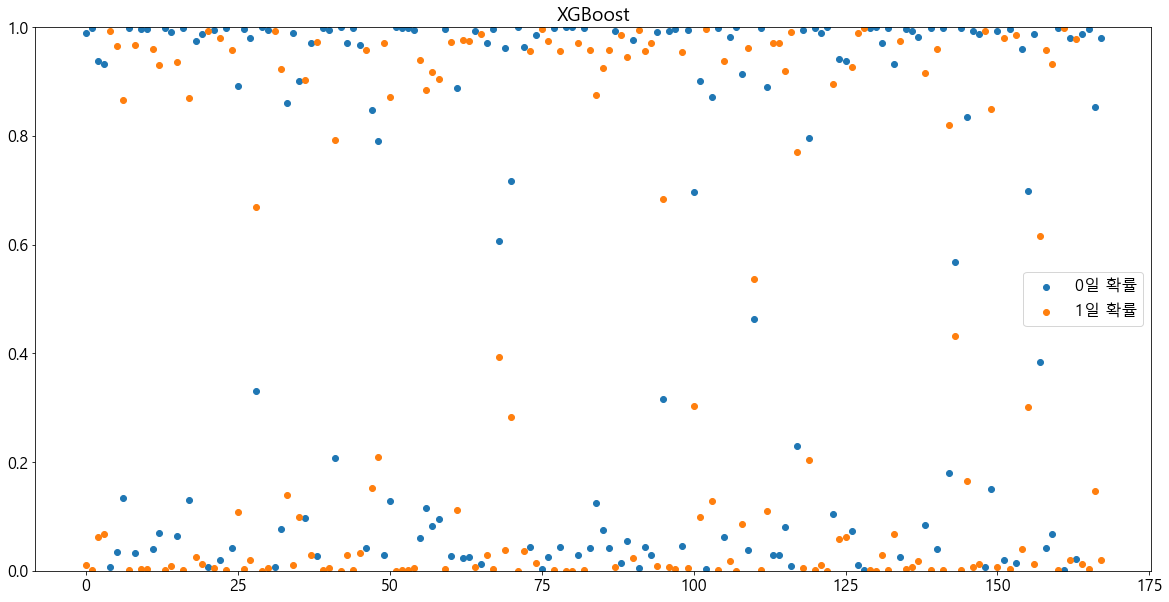

In [90]:
# 0일 확률들
a10 = y_pred_proba9[:, 0]
# 1일 확률들
a11 = y_pred_proba9[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.ylim(0, 1)
plt.legend()
plt.title('XGBoost')
plt.show()

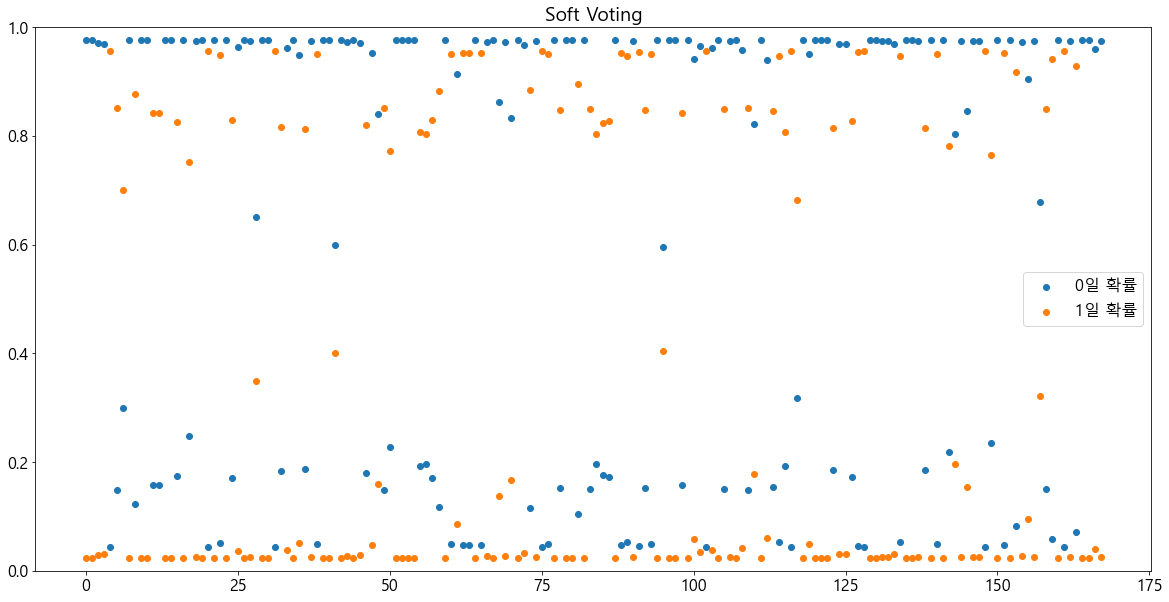

In [91]:
# 0일 확률들
a10 = y_pred_proba11[:, 0]
# 1일 확률들
a11 = y_pred_proba11[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.ylim(0, 1)
plt.legend()
plt.title('Soft Voting')
plt.show()

In [92]:
# 다른 모델들과 다른 답을 던지는 모델을 찾는다.
dict1 = {
    'KNN' : y_pred1,
    'LogisticRegression' : y_pred2,
    'SVC' : y_pred3,
    'DecisionTree' : y_pred4,
    'RandomForest' : y_pred5,
    'AdaBoost' : y_pred6,
    'GradianBoost' : y_pred7,
    'LGBM' : y_pred8,
    'XGBoost' : y_pred9,
    'Hard Voting' : y_pred10,
    'SoftVoting' : y_pred11
}

df100 = pd.DataFrame(dict1)

# 행별 총합을 구해 붙혀준다.
df100['total'] = df100.sum(axis=1)
df100

,KNN,LogisticRegression,SVC,DecisionTree,RandomForest,AdaBoost,GradianBoost,LGBM,XGBoost,Hard Voting,SoftVoting,total
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...
163,1,1,1,1,1,1,1,1,1,1,1,11
164,0,0,0,0,0,0,0,0,0,0,0,0
165,0,0,0,0,0,0,0,0,0,0,0,0
166,0,0,0,0,0,0,0,0,0,0,0,0


In [93]:
# 행별 총합을 확인한다.
df100['total'].value_counts()

0     94
10    36
11    28
1      5
3      2
9      1
4      1
2      1
Name: total, dtype: int64

In [94]:
# 총합이 0과 11이 아닌 것들을 가져온다.
df200 = df100.query('total > 0 and total < 11')
df200

,KNN,LogisticRegression,SVC,DecisionTree,RandomForest,AdaBoost,GradianBoost,LGBM,XGBoost,Hard Voting,SoftVoting,total
5,1,1,1,1,1,1,1,0,1,1,1,10
6,1,0,1,1,1,1,1,0,1,1,1,9
8,1,1,1,1,1,1,1,0,1,1,1,10
11,1,1,1,1,1,1,1,0,1,1,1,10
12,1,1,1,1,1,1,1,0,1,1,1,10
15,1,1,1,1,1,1,1,0,1,1,1,10
17,1,1,1,1,1,1,1,0,1,1,1,10
24,1,1,1,1,1,1,1,0,1,1,1,10
28,0,1,0,0,0,0,0,1,1,0,0,3
32,1,1,1,1,1,1,1,0,1,1,1,10


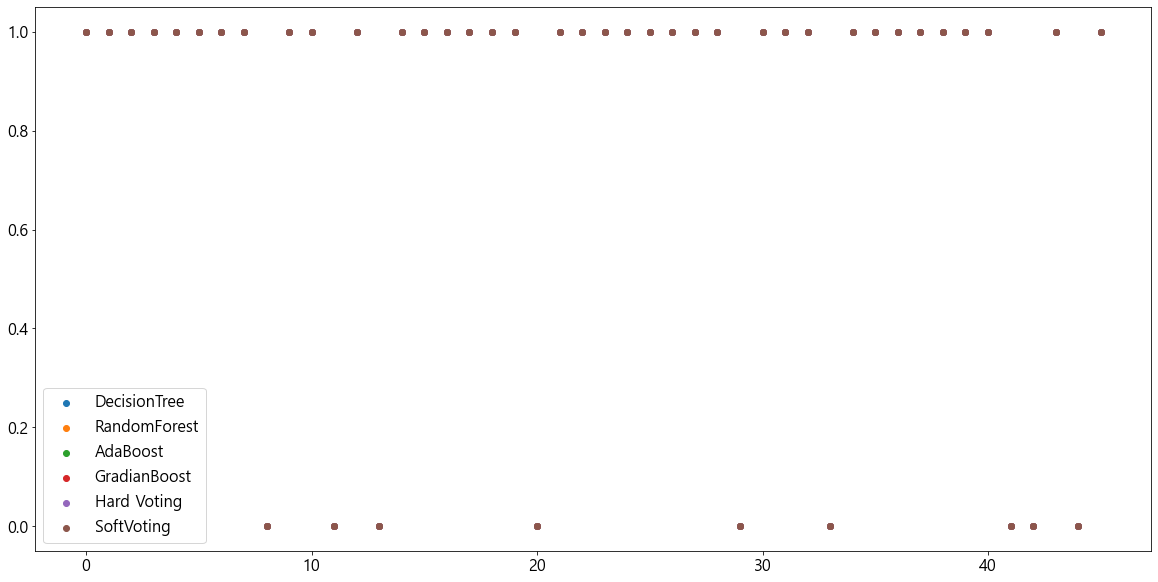

In [99]:
# 그래프를 그린다.
# plt.scatter(list(range(len(df200['KNN']))), df200['KNN'], label='KNN')
# plt.scatter(list(range(len(df200['LogisticRegression']))), df200['LogisticRegression'], label='LogisticRegression')
# plt.scatter(list(range(len(df200['SVC']))), df200['SVC'], label='SVC')
plt.scatter(list(range(len(df200['DecisionTree']))), df200['DecisionTree'], label='DecisionTree')
plt.scatter(list(range(len(df200['RandomForest']))), df200['RandomForest'], label='RandomForest')
plt.scatter(list(range(len(df200['AdaBoost']))), df200['AdaBoost'], label='AdaBoost')
plt.scatter(list(range(len(df200['GradianBoost']))), df200['GradianBoost'], label='GradianBoost')
# plt.scatter(list(range(len(df200['LGBM']))), df200['LGBM'], label='LGBM')
# plt.scatter(list(range(len(df200['XGBoost']))), df200['XGBoost'], label='XGBoost')
plt.scatter(list(range(len(df200['Hard Voting']))), df200['Hard Voting'], label='Hard Voting')
plt.scatter(list(range(len(df200['SoftVoting']))), df200['SoftVoting'], label='SoftVoting')


plt.legend()
plt.show()

In [105]:
# 최종 소프트보팅이 던지는 값을 최종 결과로 채택한다.
test_df['Outcome'] = y_pred11

test_df.to_csv('data/diabetes_result.csv')